In [1]:
# load packages required for analysis
#install.packages("")
#BiocManager::install("")

# load packages required for analysis
library(tidyverse)
library(knitr)
library(limma)
library(minfi)
library(RColorBrewer)
library(missMethyl)
library(Gviz)
library(DMRcate)
library(stringr)
library(IlluminaHumanMethylationEPICmanifest)
library(IlluminaHumanMethylationEPICanno.ilm10b4.hg19)
library(ggplot2)
library(ggpubr)
library(wateRmelon)
library(repr)
library(GenomicRanges)
library(diffloop)
library(GeneOverlap)
library(clipr)
library("org.Hs.eg.db")
library("biomaRt")
library("GenomicFeatures")
library("BRGenomics")

library(tidyverse)
library(splitstackshape)
library("pheatmap")

print("done loading packages")


── Attaching packages ───────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ──────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, m

[1] "done loading packages"


In [6]:
### import necessary variables
project_master_dir = "/stg3/data2/resource3/project/RA-TIP-CS"

# input
analysis_object_fp = paste0(project_master_dir, "/Data/Processed_Data", "/02.gmSet_snpQCfiltered_All_dasen.RDS") # Female only, All Chom, yes SNP QC filtering
donor_metadata_fp = paste0(project_master_dir, "/Data/Metadata/TIP-CS_metadata_HIPAAcomp.csv") 


# output directories
dir.create(file.path(paste0(project_master_dir, "/Analysis")), showWarnings = FALSE)

version_dir = "/YesSNPqc_Female_Allchrom"
dir.create(file.path(paste0(project_master_dir, "/Analysis", version_dir)), showWarnings = FALSE)

sampleVectors_output_dir = paste0(project_master_dir, "/Analysis", version_dir, "/SampleVectors")
dir.create(file.path(sampleVectors_output_dir), showWarnings = FALSE)

dml_output_dir = paste0(project_master_dir, "/Analysis", version_dir, "/DMLs")
dir.create(file.path(dml_output_dir), showWarnings = FALSE)

dmg_output_dir = paste0(project_master_dir, "/Analysis", version_dir, "/DMGs")
dir.create(file.path(dmg_output_dir), showWarnings = FALSE)

dataLog_fp = paste0(project_master_dir, "/Analysis", version_dir, "/dataLog.txt")

In [3]:
### Perform DML Analysis
# define matrix
analysis_obj = readRDS(analysis_object_fp)
analysis_df = getBeta(analysis_obj)

In [4]:
# import data to patient mapping metadata
master_map_df = as.data.frame(read_delim(donor_metadata_fp, delim = "\t", col_names = TRUE, show_col_types = FALSE))
dim(master_map_df)

# remove samples that failed QC
qcSample_vector = c("p20_ls23_Tnai_CCPpos")
master_map_df = master_map_df[!(master_map_df$unique_id %in% qcSample_vector), ]
dim(master_map_df)


New names:
• `` -> `...1`


[1] 382  11

[1] 381  11

In [5]:
### Create vectors of samples by group
# All cell-types, All diagnosis categories
allC_allD_allS_cohort1_df = master_map_df[master_map_df$cohort == "cohort1", ]
allC_allD_allS_cohort1_vector = as.vector(allC_allD_allS_cohort1_df$unique_id)
length(allC_allD_allS_cohort1_vector)

allC_allD_allS_cohort2_df = master_map_df[(master_map_df$cohort == "cohort2"), ]
allC_allD_allS_cohort2_vector = as.vector(allC_allD_allS_cohort2_df$unique_id)
length(allC_allD_allS_cohort2_vector)

allC_allD_F_cohort1_df = master_map_df[master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
allC_allD_F_cohort1_vector = as.vector(allC_allD_F_cohort1_df$unique_id)
length(allC_allD_F_cohort1_vector)

allC_allD_F_cohort2_df = master_map_df[master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
allC_allD_F_cohort2_vector = as.vector(allC_allD_F_cohort2_df$unique_id)
length(allC_allD_F_cohort2_vector)



## B-Cell
# B-Cell, All diagnosis categories
bCell_allD_allS_cohort1_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$cohort == "cohort1", ]
bCell_allD_allS_cohort1_vector = as.vector(bCell_allD_allS_cohort1_df$unique_id)
length(bCell_allD_allS_cohort1_vector)

bCell_allD_allS_cohort2_df = master_map_df[master_map_df$cell_type == "B" & (master_map_df$cohort == "cohort2"), ]
bCell_allD_allS_cohort2_vector = as.vector(bCell_allD_allS_cohort2_df$unique_id)
length(bCell_allD_allS_cohort2_vector)

bCell_allD_F_cohort1_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
bCell_allD_F_cohort1_vector = as.vector(bCell_allD_F_cohort1_df$unique_id)
length(bCell_allD_F_cohort1_vector)

bCell_allD_F_cohort2_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
bCell_allD_F_cohort2_vector = as.vector(bCell_allD_F_cohort2_df$unique_id)
length(bCell_allD_F_cohort2_vector)

# B-Cell, CCP-
bCell_ccpM_allS_cohort1_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "CCPneg" & master_map_df$cohort == "cohort1", ]
bCell_ccpM_allS_cohort1_vector = as.vector(bCell_ccpM_allS_cohort1_df$unique_id)
length(bCell_ccpM_allS_cohort1_vector)

bCell_ccpM_allS_cohort2_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "CCPneg" & (master_map_df$cohort == "cohort2"), ]
bCell_ccpM_allS_cohort2_vector = as.vector(bCell_ccpM_allS_cohort2_df$unique_id)
length(bCell_ccpM_allS_cohort2_vector)

bCell_ccpM_F_cohort1_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "CCPneg" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
bCell_ccpM_F_cohort1_vector = as.vector(bCell_ccpM_F_cohort1_df$unique_id)
length(bCell_ccpM_F_cohort1_vector)

bCell_ccpM_F_cohort2_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "CCPneg" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
bCell_ccpM_F_cohort2_vector = as.vector(bCell_ccpM_F_cohort2_df$unique_id)
length(bCell_ccpM_F_cohort2_vector)

# B-Cell, Early RA
bCell_era_allS_cohort1_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "ERA" & master_map_df$cohort == "cohort1", ]
bCell_era_allS_cohort1_vector = as.vector(bCell_era_allS_cohort1_df$unique_id)
length(bCell_era_allS_cohort1_vector)

bCell_era_allS_cohort2_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "ERA" & (master_map_df$cohort == "cohort2"), ]
bCell_era_allS_cohort2_vector = as.vector(bCell_era_allS_cohort2_df$unique_id)
length(bCell_era_allS_cohort2_vector)

bCell_era_F_cohort1_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "ERA" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
bCell_era_F_cohort1_vector = as.vector(bCell_era_F_cohort1_df$unique_id)
length(bCell_era_F_cohort1_vector)

bCell_era_F_cohort2_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "ERA" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
bCell_era_F_cohort2_vector = as.vector(bCell_era_F_cohort2_df$unique_id)
length(bCell_era_F_cohort2_vector)

# B-Cell, CCP+
bCell_ccpP_allS_cohort1_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "CCPpos" & master_map_df$cohort == "cohort1", ]
bCell_ccpP_allS_cohort1_vector = as.vector(bCell_ccpP_allS_cohort1_df$unique_id)
length(bCell_ccpP_allS_cohort1_vector)

bCell_ccpP_allS_cohort2_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "CCPpos" & (master_map_df$cohort == "cohort2"), ]
bCell_ccpP_allS_cohort2_vector = as.vector(bCell_ccpP_allS_cohort2_df$unique_id)
length(bCell_ccpP_allS_cohort2_vector)

bCell_ccpP_F_cohort1_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "CCPpos" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
bCell_ccpP_F_cohort1_vector = as.vector(bCell_ccpP_F_cohort1_df$unique_id)
length(bCell_ccpP_F_cohort1_vector)

bCell_ccpP_F_cohort2_df = master_map_df[master_map_df$cell_type == "B" & master_map_df$clinicalBaseline_status == "CCPpos" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
bCell_ccpP_F_cohort2_vector = as.vector(bCell_ccpP_F_cohort2_df$unique_id)
length(bCell_ccpP_F_cohort2_vector)



## Memory T-Cell
# Memory T-Cell, All diagnosis categories
tMem_allD_allS_cohort1_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$cohort == "cohort1", ]
tMem_allD_allS_cohort1_vector = as.vector(tMem_allD_allS_cohort1_df$unique_id)
length(tMem_allD_allS_cohort1_vector)

tMem_allD_allS_cohort2_df = master_map_df[master_map_df$cell_type == "Tmem" & (master_map_df$cohort == "cohort2"), ]
tMem_allD_allS_cohort2_vector = as.vector(tMem_allD_allS_cohort2_df$unique_id)
length(tMem_allD_allS_cohort2_vector)

tMem_allD_F_cohort1_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
tMem_allD_F_cohort1_vector = as.vector(tMem_allD_F_cohort1_df$unique_id)
length(tMem_allD_F_cohort1_vector)

tMem_allD_F_cohort2_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
tMem_allD_F_cohort2_vector = as.vector(tMem_allD_F_cohort2_df$unique_id)
length(tMem_allD_F_cohort2_vector)

# Memory T-Cell, CCP-
tMem_ccpM_allS_cohort1_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "CCPneg" & master_map_df$cohort == "cohort1", ]
tMem_ccpM_allS_cohort1_vector = as.vector(tMem_ccpM_allS_cohort1_df$unique_id)
length(tMem_ccpM_allS_cohort1_vector)

tMem_ccpM_allS_cohort2_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "CCPneg" & (master_map_df$cohort == "cohort2"), ]
tMem_ccpM_allS_cohort2_vector = as.vector(tMem_ccpM_allS_cohort2_df$unique_id)
length(tMem_ccpM_allS_cohort2_vector)

tMem_ccpM_F_cohort1_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "CCPneg" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
tMem_ccpM_F_cohort1_vector = as.vector(tMem_ccpM_F_cohort1_df$unique_id)
length(tMem_ccpM_F_cohort1_vector)

tMem_ccpM_F_cohort2_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "CCPneg" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
tMem_ccpM_F_cohort2_vector = as.vector(tMem_ccpM_F_cohort2_df$unique_id)
length(tMem_ccpM_F_cohort2_vector)

# Memory T-Cell, Early RA
tMem_era_allS_cohort1_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "ERA" & master_map_df$cohort == "cohort1", ]
tMem_era_allS_cohort1_vector = as.vector(tMem_era_allS_cohort1_df$unique_id)
length(tMem_era_allS_cohort1_vector)

tMem_era_allS_cohort2_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "ERA" & (master_map_df$cohort == "cohort2"), ]
tMem_era_allS_cohort2_vector = as.vector(tMem_era_allS_cohort2_df$unique_id)
length(tMem_era_allS_cohort2_vector)

tMem_era_F_cohort1_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "ERA" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
tMem_era_F_cohort1_vector = as.vector(tMem_era_F_cohort1_df$unique_id)
length(tMem_era_F_cohort1_vector)

tMem_era_F_cohort2_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "ERA" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
tMem_era_F_cohort2_vector = as.vector(tMem_era_F_cohort2_df$unique_id)
length(tMem_era_F_cohort2_vector)

# Memory T-Cell, CCP+
tMem_ccpP_allS_cohort1_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "CCPpos" & master_map_df$cohort == "cohort1", ]
tMem_ccpP_allS_cohort1_vector = as.vector(tMem_ccpP_allS_cohort1_df$unique_id)
length(tMem_ccpP_allS_cohort1_vector)

tMem_ccpP_allS_cohort2_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "CCPpos" & (master_map_df$cohort == "cohort2"), ]
tMem_ccpP_allS_cohort2_vector = as.vector(tMem_ccpP_allS_cohort2_df$unique_id)
length(tMem_ccpP_allS_cohort2_vector)

tMem_ccpP_F_cohort1_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "CCPpos" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
tMem_ccpP_F_cohort1_vector = as.vector(tMem_ccpP_F_cohort1_df$unique_id)
length(tMem_ccpP_F_cohort1_vector)

tMem_ccpP_F_cohort2_df = master_map_df[master_map_df$cell_type == "Tmem" & master_map_df$clinicalBaseline_status == "CCPpos" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
tMem_ccpP_F_cohort2_vector = as.vector(tMem_ccpP_F_cohort2_df$unique_id)
length(tMem_ccpP_F_cohort2_vector)



## Naive T-Cell
# Naive T-Cell, All diagnosis categories
tNai_allD_allS_cohort1_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$cohort == "cohort1", ]
tNai_allD_allS_cohort1_vector = as.vector(tNai_allD_allS_cohort1_df$unique_id)
length(tNai_allD_allS_cohort1_vector)

tNai_allD_allS_cohort2_df = master_map_df[master_map_df$cell_type == "Tnai" & (master_map_df$cohort == "cohort2"), ]
tNai_allD_allS_cohort2_vector = as.vector(tNai_allD_allS_cohort2_df$unique_id)
length(tNai_allD_allS_cohort2_vector)

tNai_allD_F_cohort1_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
tNai_allD_F_cohort1_vector = as.vector(tNai_allD_F_cohort1_df$unique_id)
length(tNai_allD_F_cohort1_vector)

tNai_allD_F_cohort2_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
tNai_allD_F_cohort2_vector = as.vector(tNai_allD_F_cohort2_df$unique_id)
length(tNai_allD_F_cohort2_vector)

# Naive T-Cell, CCP-
tNai_ccpM_allS_cohort1_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "CCPneg" & master_map_df$cohort == "cohort1", ]
tNai_ccpM_allS_cohort1_vector = as.vector(tNai_ccpM_allS_cohort1_df$unique_id)
length(tNai_ccpM_allS_cohort1_vector)

tNai_ccpM_allS_cohort2_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "CCPneg" & (master_map_df$cohort == "cohort2"), ]
tNai_ccpM_allS_cohort2_vector = as.vector(tNai_ccpM_allS_cohort2_df$unique_id)
length(tNai_ccpM_allS_cohort2_vector)

tNai_ccpM_F_cohort1_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "CCPneg" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
tNai_ccpM_F_cohort1_vector = as.vector(tNai_ccpM_F_cohort1_df$unique_id)
length(tNai_ccpM_F_cohort1_vector)

tNai_ccpM_F_cohort2_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "CCPneg" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
tNai_ccpM_F_cohort2_vector = as.vector(tNai_ccpM_F_cohort2_df$unique_id)
length(tNai_ccpM_F_cohort2_vector)

# Naive T-Cell, Early RA
tNai_era_allS_cohort1_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "ERA" & master_map_df$cohort == "cohort1", ]
tNai_era_allS_cohort1_vector = as.vector(tNai_era_allS_cohort1_df$unique_id)
length(tNai_era_allS_cohort1_vector)

tNai_era_allS_cohort2_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "ERA" & (master_map_df$cohort == "cohort2"), ]
tNai_era_allS_cohort2_vector = as.vector(tNai_era_allS_cohort2_df$unique_id)
length(tNai_era_allS_cohort2_vector)

tNai_era_F_cohort1_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "ERA" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
tNai_era_F_cohort1_vector = as.vector(tNai_era_F_cohort1_df$unique_id)
length(tNai_era_F_cohort1_vector)

tNai_era_F_cohort2_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "ERA" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
tNai_era_F_cohort2_vector = as.vector(tNai_era_F_cohort2_df$unique_id)
length(tNai_era_F_cohort2_vector)

# Naive T-Cell, CCP+
tNai_ccpP_allS_cohort1_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "CCPpos" & master_map_df$cohort == "cohort1", ]
tNai_ccpP_allS_cohort1_vector = as.vector(tNai_ccpP_allS_cohort1_df$unique_id)
length(tNai_ccpP_allS_cohort1_vector)

tNai_ccpP_allS_cohort2_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "CCPpos" & (master_map_df$cohort == "cohort2"), ]
tNai_ccpP_allS_cohort2_vector = as.vector(tNai_ccpP_allS_cohort2_df$unique_id)
length(tNai_ccpP_allS_cohort2_vector)

tNai_ccpP_F_cohort1_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "CCPpos" & master_map_df$sex == "Female" & master_map_df$cohort == "cohort1", ]
tNai_ccpP_F_cohort1_vector = as.vector(tNai_ccpP_F_cohort1_df$unique_id)
length(tNai_ccpP_F_cohort1_vector)

tNai_ccpP_F_cohort2_df = master_map_df[master_map_df$cell_type == "Tnai" & master_map_df$clinicalBaseline_status == "CCPpos" & master_map_df$sex == "Female" & (master_map_df$cohort == "cohort2"), ]
tNai_ccpP_F_cohort2_vector = as.vector(tNai_ccpP_F_cohort2_df$unique_id)
length(tNai_ccpP_F_cohort2_vector)




[1] 130

[1] 251

[1] 130

[1] 251

[1] 39

[1] 84

[1] 39

[1] 84

[1] 17

[1] 31

[1] 17

[1] 31

[1] 4

[1] 17

[1] 4

[1] 17

[1] 18

[1] 36

[1] 18

[1] 36

[1] 46

[1] 84

[1] 46

[1] 84

[1] 21

[1] 31

[1] 21

[1] 31

[1] 5

[1] 17

[1] 5

[1] 17

[1] 20

[1] 36

[1] 20

[1] 36

[1] 45

[1] 83

[1] 45

[1] 83

[1] 21

[1] 31

[1] 21

[1] 31

[1] 5

[1] 17

[1] 5

[1] 17

[1] 19

[1] 35

[1] 19

[1] 35

In [6]:
## export
setwd(sampleVectors_output_dir)

# all cell type
write_csv(data.frame(sort(allC_allD_allS_cohort1_vector)), "allC_allD_allS_cohort1_vector.csv")
write_csv(data.frame(sort(allC_allD_allS_cohort2_vector)), "allC_allD_allS_cohort2_vector.csv")
write_csv(data.frame(sort(allC_allD_F_cohort1_vector)), "allC_allD_F_cohort1_vector.csv")
write_csv(data.frame(sort(allC_allD_F_cohort1_vector)), "allC_allD_F_cohort2_vector.csv")


# bCell
write_csv(data.frame(sort(bCell_allD_allS_cohort1_vector)), "bCell_allD_allS_cohort1_vector.csv")
write_csv(data.frame(sort(bCell_allD_allS_cohort2_vector)), "bCell_allD_allS_cohort2_vector.csv")
write_csv(data.frame(sort(bCell_allD_F_cohort1_vector)), "bCell_allD_F_cohort1_vector.csv")
write_csv(data.frame(sort(bCell_allD_F_cohort2_vector)), "bCell_allD_F_cohort2_vector.csv")

write_csv(data.frame(sort(bCell_ccpM_allS_cohort1_vector)), "bCell_ccpM_allS_cohort1_vector.csv")
write_csv(data.frame(sort(bCell_ccpM_allS_cohort2_vector)), "bCell_ccpM_allS_cohort2_vector.csv")
write_csv(data.frame(sort(bCell_ccpM_F_cohort1_vector)), "bCell_ccpM_F_cohort1_vector.csv")
write_csv(data.frame(sort(bCell_ccpM_F_cohort2_vector)), "bCell_ccpM_F_cohort2_vector.csv")

write_csv(data.frame(sort(bCell_era_allS_cohort1_vector)), "bCell_era_allS_cohort1_vector.csv")
write_csv(data.frame(sort(bCell_era_allS_cohort2_vector)), "bCell_era_allS_cohort2_vector.csv")
write_csv(data.frame(sort(bCell_era_F_cohort1_vector)), "bCell_era_F_cohort1_vector.csv")
write_csv(data.frame(sort(bCell_era_F_cohort2_vector)), "bCell_era_F_cohort2_vector.csv")

write_csv(data.frame(sort(bCell_ccpP_allS_cohort1_vector)), "bCell_ccpP_allS_cohort1_vector.csv")
write_csv(data.frame(sort(bCell_ccpP_allS_cohort2_vector)), "bCell_ccpP_allS_cohort2_vector.csv")
write_csv(data.frame(sort(bCell_ccpP_F_cohort1_vector)), "bCell_ccpP_F_cohort1_vector.csv")
write_csv(data.frame(sort(bCell_ccpP_F_cohort2_vector)), "bCell_ccpP_F_cohort2_vector.csv")


# tMem
write_csv(data.frame(sort(tMem_allD_allS_cohort1_vector)), "tMem_allD_allS_cohort1_vector.csv")
write_csv(data.frame(sort(tMem_allD_allS_cohort2_vector)), "tMem_allD_allS_cohort2_vector.csv")
write_csv(data.frame(sort(tMem_allD_F_cohort1_vector)), "tMem_allD_F_cohort1_vector.csv")
write_csv(data.frame(sort(tMem_allD_F_cohort2_vector)), "tMem_allD_F_cohort2_vector.csv")

write_csv(data.frame(sort(tMem_ccpM_allS_cohort1_vector)), "tMem_ccpM_allS_cohort1_vector.csv")
write_csv(data.frame(sort(tMem_ccpM_allS_cohort2_vector)), "tMem_ccpM_allS_cohort2_vector.csv")
write_csv(data.frame(sort(tMem_ccpM_F_cohort1_vector)), "tMem_ccpM_F_cohort1_vector.csv")
write_csv(data.frame(sort(tMem_ccpM_F_cohort2_vector)), "tMem_ccpM_F_cohort2_vector.csv")

write_csv(data.frame(sort(tMem_era_allS_cohort1_vector)), "tMem_era_allS_cohort1_vector.csv")
write_csv(data.frame(sort(tMem_era_allS_cohort2_vector)), "tMem_era_allS_cohort2_vector.csv")
write_csv(data.frame(sort(tMem_era_F_cohort1_vector)), "tMem_era_F_cohort1_vector.csv")
write_csv(data.frame(sort(tMem_era_F_cohort2_vector)), "tMem_era_F_cohort2_vector.csv")

write_csv(data.frame(sort(tMem_ccpP_allS_cohort1_vector)), "tMem_ccpP_allS_cohort1_vector.csv")
write_csv(data.frame(sort(tMem_ccpP_allS_cohort2_vector)), "tMem_ccpP_allS_cohort2_vector.csv")
write_csv(data.frame(sort(tMem_ccpP_F_cohort1_vector)), "tMem_ccpP_F_cohort1_vector.csv")
write_csv(data.frame(sort(tMem_ccpP_F_cohort2_vector)), "tMem_ccpP_F_cohort2_vector.csv")


# tNai
write_csv(data.frame(sort(tNai_allD_allS_cohort1_vector)), "tNai_allD_allS_cohort1_vector.csv")
write_csv(data.frame(sort(tNai_allD_allS_cohort2_vector)), "tNai_allD_allS_cohort2_vector.csv")
write_csv(data.frame(sort(tNai_allD_F_cohort1_vector)), "tNai_allD_F_cohort1_vector.csv")
write_csv(data.frame(sort(tNai_allD_F_cohort2_vector)), "tNai_allD_F_cohort2_vector.csv")

write_csv(data.frame(sort(tNai_ccpM_allS_cohort1_vector)), "tNai_ccpM_allS_cohort1_vector.csv")
write_csv(data.frame(sort(tNai_ccpM_allS_cohort2_vector)), "tNai_ccpM_allS_cohort2_vector.csv")
write_csv(data.frame(sort(tNai_ccpM_F_cohort1_vector)), "tNai_ccpM_F_cohort1_vector.csv")
write_csv(data.frame(sort(tNai_ccpM_F_cohort2_vector)), "tNai_ccpM_F_cohort2_vector.csv")

write_csv(data.frame(sort(tNai_era_allS_cohort1_vector)), "tNai_era_allS_cohort1_vector.csv")
write_csv(data.frame(sort(tNai_era_allS_cohort2_vector)), "tNai_era_allS_cohort2_vector.csv")
write_csv(data.frame(sort(tNai_era_F_cohort1_vector)), "tNai_era_F_cohort1_vector.csv")
write_csv(data.frame(sort(tNai_era_F_cohort2_vector)), "tNai_era_F_cohort2_vector.csv")

write_csv(data.frame(sort(tNai_ccpP_allS_cohort1_vector)), "tNai_ccpP_allS_cohort1_vector.csv")
write_csv(data.frame(sort(tNai_ccpP_allS_cohort2_vector)), "tNai_ccpP_allS_cohort2_vector.csv")
write_csv(data.frame(sort(tNai_ccpP_F_cohort1_vector)), "tNai_ccpP_F_cohort1_vector.csv")
write_csv(data.frame(sort(tNai_ccpP_F_cohort2_vector)), "tNai_ccpP_F_cohort2_vector.csv")



In [7]:
## Create vectors of relevant stats for each comparison
## P-Value
# B-Cell, CCP+ vs CCP-
pVal_bCell_ccpPvccpM_allS_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_allS_cohort1_vector, bCell_ccpP_allS_cohort2_vector)], 
                                                                                                        x[c(bCell_ccpM_allS_cohort1_vector, bCell_ccpM_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpPvccpM_allS_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_allS_cohort1_vector)], x[c(bCell_ccpM_allS_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpPvccpM_allS_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_allS_cohort2_vector)], x[c(bCell_ccpM_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpPvccpM_F_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_F_cohort1_vector, bCell_ccpP_F_cohort2_vector)], 
                                                                                                        x[c(bCell_ccpM_F_cohort1_vector, bCell_ccpM_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpPvccpM_F_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_F_cohort1_vector)], x[c(bCell_ccpM_F_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpPvccpM_F_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_F_cohort2_vector)], x[c(bCell_ccpM_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)
                                                 

# B-Cell, CCP+ vs ERA
pVal_bCell_ccpPvera_allS_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_allS_cohort1_vector, bCell_ccpP_allS_cohort2_vector)], 
                                                                                                        x[c(bCell_era_allS_cohort1_vector, bCell_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpPvera_allS_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_allS_cohort1_vector)], x[c(bCell_era_allS_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpPvera_allS_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_allS_cohort2_vector)], x[c(bCell_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpPvera_F_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_F_cohort1_vector, bCell_ccpP_F_cohort2_vector)], 
                                                                                                        x[c(bCell_era_F_cohort1_vector, bCell_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpPvera_F_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_F_cohort1_vector)], x[c(bCell_era_F_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpPvera_F_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpP_F_cohort2_vector)], x[c(bCell_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

                                             
# B-Cell, CCP- vs ERA
pVal_bCell_ccpMvera_allS_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpM_allS_cohort1_vector, bCell_ccpM_allS_cohort2_vector)], 
                                                                                                        x[c(bCell_era_allS_cohort1_vector, bCell_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpMvera_allS_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpM_allS_cohort1_vector)], x[c(bCell_era_allS_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpMvera_allS_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpM_allS_cohort2_vector)], x[c(bCell_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpMvera_F_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpM_F_cohort1_vector, bCell_ccpM_F_cohort2_vector)], 
                                                                                                        x[c(bCell_era_F_cohort1_vector, bCell_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpMvera_F_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpM_F_cohort1_vector)], x[c(bCell_era_F_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_bCell_ccpMvera_F_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(bCell_ccpM_F_cohort2_vector)], x[c(bCell_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

# Memory T-Cell, CCP+ vs CCP-
pVal_tMem_ccpPvccpM_allS_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_allS_cohort1_vector, tMem_ccpP_allS_cohort2_vector)], 
                                                                                                        x[c(tMem_ccpM_allS_cohort1_vector, tMem_ccpM_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpPvccpM_allS_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_allS_cohort1_vector)], x[c(tMem_ccpM_allS_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpPvccpM_allS_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_allS_cohort2_vector)], x[c(tMem_ccpM_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpPvccpM_F_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_F_cohort1_vector, tMem_ccpP_F_cohort2_vector)], 
                                                                                                        x[c(tMem_ccpM_F_cohort1_vector, tMem_ccpM_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpPvccpM_F_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_F_cohort1_vector)], x[c(tMem_ccpM_F_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpPvccpM_F_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_F_cohort2_vector)], x[c(tMem_ccpM_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)
                                                 

# Memory T-Cell, CCP+ vs ERA
pVal_tMem_ccpPvera_allS_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_allS_cohort1_vector, tMem_ccpP_allS_cohort2_vector)], 
                                                                                                        x[c(tMem_era_allS_cohort1_vector, tMem_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpPvera_allS_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_allS_cohort1_vector)], x[c(tMem_era_allS_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpPvera_allS_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_allS_cohort2_vector)], x[c(tMem_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpPvera_F_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_F_cohort1_vector, tMem_ccpP_F_cohort2_vector)], 
                                                                                                        x[c(tMem_era_F_cohort1_vector, tMem_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpPvera_F_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_F_cohort1_vector)], x[c(tMem_era_F_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpPvera_F_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpP_F_cohort2_vector)], x[c(tMem_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

                                             
# Memory T-Cell, CCP- vs ERA
pVal_tMem_ccpMvera_allS_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpM_allS_cohort1_vector, tMem_ccpM_allS_cohort2_vector)], 
                                                                                                        x[c(tMem_era_allS_cohort1_vector, tMem_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpMvera_allS_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpM_allS_cohort1_vector)], x[c(tMem_era_allS_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpMvera_allS_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpM_allS_cohort2_vector)], x[c(tMem_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpMvera_F_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpM_F_cohort1_vector, tMem_ccpM_F_cohort2_vector)], 
                                                                                                        x[c(tMem_era_F_cohort1_vector, tMem_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpMvera_F_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpM_F_cohort1_vector)], x[c(tMem_era_F_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tMem_ccpMvera_F_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tMem_ccpM_F_cohort2_vector)], x[c(tMem_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

# Naive T-Cell, CCP+ vs CCP-
pVal_tNai_ccpPvccpM_allS_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_allS_cohort1_vector, tNai_ccpP_allS_cohort2_vector)], 
                                                                                                        x[c(tNai_ccpM_allS_cohort1_vector, tNai_ccpM_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpPvccpM_allS_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_allS_cohort1_vector)], x[c(tNai_ccpM_allS_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpPvccpM_allS_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_allS_cohort2_vector)], x[c(tNai_ccpM_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpPvccpM_F_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_F_cohort1_vector, tNai_ccpP_F_cohort2_vector)], 
                                                                                                        x[c(tNai_ccpM_F_cohort1_vector, tNai_ccpM_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpPvccpM_F_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_F_cohort1_vector)], x[c(tNai_ccpM_F_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpPvccpM_F_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_F_cohort2_vector)], x[c(tNai_ccpM_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)
                                                 

# Naive T-Cell, CCP+ vs ERA
pVal_tNai_ccpPvera_allS_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_allS_cohort1_vector, tNai_ccpP_allS_cohort2_vector)], 
                                                                                                        x[c(tNai_era_allS_cohort1_vector, tNai_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpPvera_allS_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_allS_cohort1_vector)], x[c(tNai_era_allS_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpPvera_allS_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_allS_cohort2_vector)], x[c(tNai_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpPvera_F_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_F_cohort1_vector, tNai_ccpP_F_cohort2_vector)], 
                                                                                                        x[c(tNai_era_F_cohort1_vector, tNai_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpPvera_F_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_F_cohort1_vector)], x[c(tNai_era_F_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpPvera_F_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpP_F_cohort2_vector)], x[c(tNai_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

                                             
# Naive T-Cell, CCP- vs ERA
pVal_tNai_ccpMvera_allS_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpM_allS_cohort1_vector, tNai_ccpM_allS_cohort2_vector)], 
                                                                                                        x[c(tNai_era_allS_cohort1_vector, tNai_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpMvera_allS_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpM_allS_cohort1_vector)], x[c(tNai_era_allS_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpMvera_allS_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpM_allS_cohort2_vector)], x[c(tNai_era_allS_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpMvera_F_cohortAll_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpM_F_cohort1_vector, tNai_ccpM_F_cohort2_vector)], 
                                                                                                        x[c(tNai_era_F_cohort1_vector, tNai_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpMvera_F_cohort1_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpM_F_cohort1_vector)], x[c(tNai_era_F_cohort1_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

pVal_tNai_ccpMvera_F_cohort2_vector = apply(analysis_df, 1, function (x) t.test(x[c(tNai_ccpM_F_cohort2_vector)], x[c(tNai_era_F_cohort2_vector)], 
                                                                                                        alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)
                                             

In [8]:
## Create vectors of relevant stats for each comparison
## Beta Average Difference
# B-Cell, CCP+ vs CCP-
bDif_bCell_ccpPvccpM_allS_cohortAll_vector = rowMeans(analysis_df[, c(bCell_ccpP_allS_cohort1_vector, bCell_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_ccpM_allS_cohort1_vector, bCell_ccpM_allS_cohort2_vector)])
bDif_bCell_ccpPvccpM_allS_cohort1_vector = rowMeans(analysis_df[, c(bCell_ccpP_allS_cohort1_vector)]) - rowMeans(analysis_df[, c(bCell_ccpM_allS_cohort1_vector)])
bDif_bCell_ccpPvccpM_allS_cohort2_vector = rowMeans(analysis_df[, c(bCell_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_ccpM_allS_cohort2_vector)])

bDif_bCell_ccpPvccpM_F_cohortAll_vector = rowMeans(analysis_df[, c(bCell_ccpP_F_cohort1_vector, bCell_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_ccpM_F_cohort1_vector, bCell_ccpM_F_cohort2_vector)])
bDif_bCell_ccpPvccpM_F_cohort1_vector = rowMeans(analysis_df[, c(bCell_ccpP_F_cohort1_vector)]) - rowMeans(analysis_df[, c(bCell_ccpM_F_cohort1_vector)])
bDif_bCell_ccpPvccpM_F_cohort2_vector = rowMeans(analysis_df[, c(bCell_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_ccpM_F_cohort2_vector)])

# B-Cell, CCP+ vs ERA
bDif_bCell_ccpPvera_allS_cohortAll_vector = rowMeans(analysis_df[, c(bCell_ccpP_allS_cohort1_vector, bCell_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_era_allS_cohort1_vector, bCell_era_allS_cohort2_vector)])
bDif_bCell_ccpPvera_allS_cohort1_vector = rowMeans(analysis_df[, c(bCell_ccpP_allS_cohort1_vector)]) - rowMeans(analysis_df[, c(bCell_era_allS_cohort1_vector)])
bDif_bCell_ccpPvera_allS_cohort2_vector = rowMeans(analysis_df[, c(bCell_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_era_allS_cohort2_vector)])

bDif_bCell_ccpPvera_F_cohortAll_vector = rowMeans(analysis_df[, c(bCell_ccpP_F_cohort1_vector, bCell_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_era_F_cohort1_vector, bCell_era_F_cohort2_vector)])
bDif_bCell_ccpPvera_F_cohort1_vector = rowMeans(analysis_df[, c(bCell_ccpP_F_cohort1_vector)]) - rowMeans(analysis_df[, c(bCell_era_F_cohort1_vector)])
bDif_bCell_ccpPvera_F_cohort2_vector = rowMeans(analysis_df[, c(bCell_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_era_F_cohort2_vector)])
                                             
# B-Cell, CCP- vs ERA
bDif_bCell_ccpMvera_allS_cohortAll_vector = rowMeans(analysis_df[, c(bCell_ccpM_allS_cohort1_vector, bCell_ccpM_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_era_allS_cohort1_vector, bCell_era_allS_cohort2_vector)])
bDif_bCell_ccpMvera_allS_cohort1_vector = rowMeans(analysis_df[, c(bCell_ccpM_allS_cohort1_vector)]) - rowMeans(analysis_df[, c(bCell_era_allS_cohort1_vector)])
bDif_bCell_ccpMvera_allS_cohort2_vector = rowMeans(analysis_df[, c(bCell_ccpM_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_era_allS_cohort2_vector)])

bDif_bCell_ccpMvera_F_cohortAll_vector = rowMeans(analysis_df[, c(bCell_ccpM_F_cohort1_vector, bCell_ccpM_F_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_era_F_cohort1_vector, bCell_era_F_cohort2_vector)])
bDif_bCell_ccpMvera_F_cohort1_vector = rowMeans(analysis_df[, c(bCell_ccpM_F_cohort1_vector)]) - rowMeans(analysis_df[, c(bCell_era_F_cohort1_vector)])
bDif_bCell_ccpMvera_F_cohort2_vector = rowMeans(analysis_df[, c(bCell_ccpM_F_cohort2_vector)]) - rowMeans(analysis_df[, c(bCell_era_F_cohort2_vector)])


# Memory T-Cell, CCP+ vs CCP-
bDif_tMem_ccpPvccpM_allS_cohortAll_vector = rowMeans(analysis_df[, c(tMem_ccpP_allS_cohort1_vector, tMem_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_ccpM_allS_cohort1_vector, tMem_ccpM_allS_cohort2_vector)])
bDif_tMem_ccpPvccpM_allS_cohort1_vector = rowMeans(analysis_df[, c(tMem_ccpP_allS_cohort1_vector)]) - rowMeans(analysis_df[, c(tMem_ccpM_allS_cohort1_vector)])
bDif_tMem_ccpPvccpM_allS_cohort2_vector = rowMeans(analysis_df[, c(tMem_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_ccpM_allS_cohort2_vector)])

bDif_tMem_ccpPvccpM_F_cohortAll_vector = rowMeans(analysis_df[, c(tMem_ccpP_F_cohort1_vector, tMem_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_ccpM_F_cohort1_vector, tMem_ccpM_F_cohort2_vector)])
bDif_tMem_ccpPvccpM_F_cohort1_vector = rowMeans(analysis_df[, c(tMem_ccpP_F_cohort1_vector)]) - rowMeans(analysis_df[, c(tMem_ccpM_F_cohort1_vector)])
bDif_tMem_ccpPvccpM_F_cohort2_vector = rowMeans(analysis_df[, c(tMem_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_ccpM_F_cohort2_vector)])

# Memory T-Cell, CCP+ vs ERA
bDif_tMem_ccpPvera_allS_cohortAll_vector = rowMeans(analysis_df[, c(tMem_ccpP_allS_cohort1_vector, tMem_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_era_allS_cohort1_vector, tMem_era_allS_cohort2_vector)])
bDif_tMem_ccpPvera_allS_cohort1_vector = rowMeans(analysis_df[, c(tMem_ccpP_allS_cohort1_vector)]) - rowMeans(analysis_df[, c(tMem_era_allS_cohort1_vector)])
bDif_tMem_ccpPvera_allS_cohort2_vector = rowMeans(analysis_df[, c(tMem_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_era_allS_cohort2_vector)])

bDif_tMem_ccpPvera_F_cohortAll_vector = rowMeans(analysis_df[, c(tMem_ccpP_F_cohort1_vector, tMem_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_era_F_cohort1_vector, tMem_era_F_cohort2_vector)])
bDif_tMem_ccpPvera_F_cohort1_vector = rowMeans(analysis_df[, c(tMem_ccpP_F_cohort1_vector)]) - rowMeans(analysis_df[, c(tMem_era_F_cohort1_vector)])
bDif_tMem_ccpPvera_F_cohort2_vector = rowMeans(analysis_df[, c(tMem_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_era_F_cohort2_vector)])
                                             
# Memory T-Cell, CCP- vs ERA
bDif_tMem_ccpMvera_allS_cohortAll_vector = rowMeans(analysis_df[, c(tMem_ccpM_allS_cohort1_vector, tMem_ccpM_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_era_allS_cohort1_vector, tMem_era_allS_cohort2_vector)])
bDif_tMem_ccpMvera_allS_cohort1_vector = rowMeans(analysis_df[, c(tMem_ccpM_allS_cohort1_vector)]) - rowMeans(analysis_df[, c(tMem_era_allS_cohort1_vector)])
bDif_tMem_ccpMvera_allS_cohort2_vector = rowMeans(analysis_df[, c(tMem_ccpM_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_era_allS_cohort2_vector)])

bDif_tMem_ccpMvera_F_cohortAll_vector = rowMeans(analysis_df[, c(tMem_ccpM_F_cohort1_vector, tMem_ccpM_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_era_F_cohort1_vector, tMem_era_F_cohort2_vector)])
bDif_tMem_ccpMvera_F_cohort1_vector = rowMeans(analysis_df[, c(tMem_ccpM_F_cohort1_vector)]) - rowMeans(analysis_df[, c(tMem_era_F_cohort1_vector)])
bDif_tMem_ccpMvera_F_cohort2_vector = rowMeans(analysis_df[, c(tMem_ccpM_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tMem_era_F_cohort2_vector)])


# Naive T-Cell, CCP+ vs CCP-
bDif_tNai_ccpPvccpM_allS_cohortAll_vector = rowMeans(analysis_df[, c(tNai_ccpP_allS_cohort1_vector, tNai_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_ccpM_allS_cohort1_vector, tNai_ccpM_allS_cohort2_vector)])
bDif_tNai_ccpPvccpM_allS_cohort1_vector = rowMeans(analysis_df[, c(tNai_ccpP_allS_cohort1_vector)]) - rowMeans(analysis_df[, c(tNai_ccpM_allS_cohort1_vector)])
bDif_tNai_ccpPvccpM_allS_cohort2_vector = rowMeans(analysis_df[, c(tNai_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_ccpM_allS_cohort2_vector)])

bDif_tNai_ccpPvccpM_F_cohortAll_vector = rowMeans(analysis_df[, c(tNai_ccpP_F_cohort1_vector, tNai_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_ccpM_F_cohort1_vector, tNai_ccpM_F_cohort2_vector)])
bDif_tNai_ccpPvccpM_F_cohort1_vector = rowMeans(analysis_df[, c(tNai_ccpP_F_cohort1_vector)]) - rowMeans(analysis_df[, c(tNai_ccpM_F_cohort1_vector)])
bDif_tNai_ccpPvccpM_F_cohort2_vector = rowMeans(analysis_df[, c(tNai_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_ccpM_F_cohort2_vector)])

# Naive T-Cell, CCP+ vs ERA
bDif_tNai_ccpPvera_allS_cohortAll_vector = rowMeans(analysis_df[, c(tNai_ccpP_allS_cohort1_vector, tNai_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_era_allS_cohort1_vector, tNai_era_allS_cohort2_vector)])
bDif_tNai_ccpPvera_allS_cohort1_vector = rowMeans(analysis_df[, c(tNai_ccpP_allS_cohort1_vector)]) - rowMeans(analysis_df[, c(tNai_era_allS_cohort1_vector)])
bDif_tNai_ccpPvera_allS_cohort2_vector = rowMeans(analysis_df[, c(tNai_ccpP_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_era_allS_cohort2_vector)])

bDif_tNai_ccpPvera_F_cohortAll_vector = rowMeans(analysis_df[, c(tNai_ccpP_F_cohort1_vector, tNai_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_era_F_cohort1_vector, tNai_era_F_cohort2_vector)])
bDif_tNai_ccpPvera_F_cohort1_vector = rowMeans(analysis_df[, c(tNai_ccpP_F_cohort1_vector)]) - rowMeans(analysis_df[, c(tNai_era_F_cohort1_vector)])
bDif_tNai_ccpPvera_F_cohort2_vector = rowMeans(analysis_df[, c(tNai_ccpP_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_era_F_cohort2_vector)])
                                             
# Naive T-Cell, CCP- vs ERA
bDif_tNai_ccpMvera_allS_cohortAll_vector = rowMeans(analysis_df[, c(tNai_ccpM_allS_cohort1_vector, tNai_ccpM_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_era_allS_cohort1_vector, tNai_era_allS_cohort2_vector)])
bDif_tNai_ccpMvera_allS_cohort1_vector = rowMeans(analysis_df[, c(tNai_ccpM_allS_cohort1_vector)]) - rowMeans(analysis_df[, c(tNai_era_allS_cohort1_vector)])
bDif_tNai_ccpMvera_allS_cohort2_vector = rowMeans(analysis_df[, c(tNai_ccpM_allS_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_era_allS_cohort2_vector)])

bDif_tNai_ccpMvera_F_cohortAll_vector = rowMeans(analysis_df[, c(tNai_ccpM_F_cohort1_vector, tNai_ccpM_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_era_F_cohort1_vector, tNai_era_F_cohort2_vector)])
bDif_tNai_ccpMvera_F_cohort1_vector = rowMeans(analysis_df[, c(tNai_ccpM_F_cohort1_vector)]) - rowMeans(analysis_df[, c(tNai_era_F_cohort1_vector)])
bDif_tNai_ccpMvera_F_cohort2_vector = rowMeans(analysis_df[, c(tNai_ccpM_F_cohort2_vector)]) - rowMeans(analysis_df[, c(tNai_era_F_cohort2_vector)])



In [9]:
### Create dataframe of relevant stats for each comparison
compStats_df = data.frame(pVal_bCell_ccpPvccpM_allS_cohortAll = pVal_bCell_ccpPvccpM_allS_cohortAll_vector,
                          pVal_bCell_ccpPvccpM_allS_cohort1 = pVal_bCell_ccpPvccpM_allS_cohort1_vector,
                          pVal_bCell_ccpPvccpM_allS_cohort2 = pVal_bCell_ccpPvccpM_allS_cohort2_vector,
                          pVal_bCell_ccpPvccpM_F_cohortAll = pVal_bCell_ccpPvccpM_F_cohortAll_vector,
                          pVal_bCell_ccpPvccpM_F_cohort1 = pVal_bCell_ccpPvccpM_F_cohort1_vector,
                          pVal_bCell_ccpPvccpM_F_cohort2 = pVal_bCell_ccpPvccpM_F_cohort2_vector,
                          pVal_bCell_ccpPvera_allS_cohortAll = pVal_bCell_ccpPvera_allS_cohortAll_vector,
                          pVal_bCell_ccpPvera_allS_cohort1 = pVal_bCell_ccpPvera_allS_cohort1_vector,
                          pVal_bCell_ccpPvera_allS_cohort2 = pVal_bCell_ccpPvera_allS_cohort2_vector,
                          pVal_bCell_ccpPvera_F_cohortAll = pVal_bCell_ccpPvera_F_cohortAll_vector,
                          pVal_bCell_ccpPvera_F_cohort1 = pVal_bCell_ccpPvera_F_cohort1_vector,
                          pVal_bCell_ccpPvera_F_cohort2 = pVal_bCell_ccpPvera_F_cohort2_vector,
                          pVal_bCell_ccpMvera_allS_cohortAll = pVal_bCell_ccpMvera_allS_cohortAll_vector,
                          pVal_bCell_ccpMvera_allS_cohort1 = pVal_bCell_ccpMvera_allS_cohort1_vector,
                          pVal_bCell_ccpMvera_allS_cohort2 = pVal_bCell_ccpMvera_allS_cohort2_vector,
                          pVal_bCell_ccpMvera_F_cohortAll = pVal_bCell_ccpMvera_F_cohortAll_vector,
                          pVal_bCell_ccpMvera_F_cohort1 = pVal_bCell_ccpMvera_F_cohort1_vector,
                          pVal_bCell_ccpMvera_F_cohort2 = pVal_bCell_ccpMvera_F_cohort2_vector,
                          pVal_tMem_ccpPvccpM_allS_cohortAll = pVal_tMem_ccpPvccpM_allS_cohortAll_vector,
                          pVal_tMem_ccpPvccpM_allS_cohort1 = pVal_tMem_ccpPvccpM_allS_cohort1_vector,
                          pVal_tMem_ccpPvccpM_allS_cohort2 = pVal_tMem_ccpPvccpM_allS_cohort2_vector,
                          pVal_tMem_ccpPvccpM_F_cohortAll = pVal_tMem_ccpPvccpM_F_cohortAll_vector,
                          pVal_tMem_ccpPvccpM_F_cohort1 = pVal_tMem_ccpPvccpM_F_cohort1_vector,
                          pVal_tMem_ccpPvccpM_F_cohort2 = pVal_tMem_ccpPvccpM_F_cohort2_vector,
                          pVal_tMem_ccpPvera_allS_cohortAll = pVal_tMem_ccpPvera_allS_cohortAll_vector,
                          pVal_tMem_ccpPvera_allS_cohort1 = pVal_tMem_ccpPvera_allS_cohort1_vector,
                          pVal_tMem_ccpPvera_allS_cohort2 = pVal_tMem_ccpPvera_allS_cohort2_vector,
                          pVal_tMem_ccpPvera_F_cohortAll = pVal_tMem_ccpPvera_F_cohortAll_vector,
                          pVal_tMem_ccpPvera_F_cohort1 = pVal_tMem_ccpPvera_F_cohort1_vector,
                          pVal_tMem_ccpPvera_F_cohort2 = pVal_tMem_ccpPvera_F_cohort2_vector,
                          pVal_tMem_ccpMvera_allS_cohortAll = pVal_tMem_ccpMvera_allS_cohortAll_vector,
                          pVal_tMem_ccpMvera_allS_cohort1 = pVal_tMem_ccpMvera_allS_cohort1_vector,
                          pVal_tMem_ccpMvera_allS_cohort2 = pVal_tMem_ccpMvera_allS_cohort2_vector,
                          pVal_tMem_ccpMvera_F_cohortAll = pVal_tMem_ccpMvera_F_cohortAll_vector,
                          pVal_tMem_ccpMvera_F_cohort1 = pVal_tMem_ccpMvera_F_cohort1_vector,
                          pVal_tMem_ccpMvera_F_cohort2 = pVal_tMem_ccpMvera_F_cohort2_vector,
                          pVal_tNai_ccpPvccpM_allS_cohortAll = pVal_tNai_ccpPvccpM_allS_cohortAll_vector,
                          pVal_tNai_ccpPvccpM_allS_cohort1 = pVal_tNai_ccpPvccpM_allS_cohort1_vector,
                          pVal_tNai_ccpPvccpM_allS_cohort2 = pVal_tNai_ccpPvccpM_allS_cohort2_vector,
                          pVal_tNai_ccpPvccpM_F_cohortAll = pVal_tNai_ccpPvccpM_F_cohortAll_vector,
                          pVal_tNai_ccpPvccpM_F_cohort1 = pVal_tNai_ccpPvccpM_F_cohort1_vector,
                          pVal_tNai_ccpPvccpM_F_cohort2 = pVal_tNai_ccpPvccpM_F_cohort2_vector,
                          pVal_tNai_ccpPvera_allS_cohortAll = pVal_tNai_ccpPvera_allS_cohortAll_vector,
                          pVal_tNai_ccpPvera_allS_cohort1 = pVal_tNai_ccpPvera_allS_cohort1_vector,
                          pVal_tNai_ccpPvera_allS_cohort2 = pVal_tNai_ccpPvera_allS_cohort2_vector,
                          pVal_tNai_ccpPvera_F_cohortAll = pVal_tNai_ccpPvera_F_cohortAll_vector,
                          pVal_tNai_ccpPvera_F_cohort1 = pVal_tNai_ccpPvera_F_cohort1_vector,
                          pVal_tNai_ccpPvera_F_cohort2 = pVal_tNai_ccpPvera_F_cohort2_vector,
                          pVal_tNai_ccpMvera_allS_cohortAll = pVal_tNai_ccpMvera_allS_cohortAll_vector,
                          pVal_tNai_ccpMvera_allS_cohort1 = pVal_tNai_ccpMvera_allS_cohort1_vector,
                          pVal_tNai_ccpMvera_allS_cohort2 = pVal_tNai_ccpMvera_allS_cohort2_vector,
                          pVal_tNai_ccpMvera_F_cohortAll = pVal_tNai_ccpMvera_F_cohortAll_vector,
                          pVal_tNai_ccpMvera_F_cohort1 = pVal_tNai_ccpMvera_F_cohort1_vector,
                          pVal_tNai_ccpMvera_F_cohort2 = pVal_tNai_ccpMvera_F_cohort2_vector,
                          bDif_bCell_ccpPvccpM_allS_cohortAll = bDif_bCell_ccpPvccpM_allS_cohortAll_vector,
                          bDif_bCell_ccpPvccpM_allS_cohort1 = bDif_bCell_ccpPvccpM_allS_cohort1_vector,
                          bDif_bCell_ccpPvccpM_allS_cohort2 = bDif_bCell_ccpPvccpM_allS_cohort2_vector,
                          bDif_bCell_ccpPvccpM_F_cohortAll = bDif_bCell_ccpPvccpM_F_cohortAll_vector,
                          bDif_bCell_ccpPvccpM_F_cohort1 = bDif_bCell_ccpPvccpM_F_cohort1_vector,
                          bDif_bCell_ccpPvccpM_F_cohort2 = bDif_bCell_ccpPvccpM_F_cohort2_vector,
                          bDif_bCell_ccpPvera_allS_cohortAll = bDif_bCell_ccpPvera_allS_cohortAll_vector,
                          bDif_bCell_ccpPvera_allS_cohort1 = bDif_bCell_ccpPvera_allS_cohort1_vector,
                          bDif_bCell_ccpPvera_allS_cohort2 = bDif_bCell_ccpPvera_allS_cohort2_vector,
                          bDif_bCell_ccpPvera_F_cohortAll = bDif_bCell_ccpPvera_F_cohortAll_vector,
                          bDif_bCell_ccpPvera_F_cohort1 = bDif_bCell_ccpPvera_F_cohort1_vector,
                          bDif_bCell_ccpPvera_F_cohort2 = bDif_bCell_ccpPvera_F_cohort2_vector,
                          bDif_bCell_ccpMvera_allS_cohortAll = bDif_bCell_ccpMvera_allS_cohortAll_vector,
                          bDif_bCell_ccpMvera_allS_cohort1 = bDif_bCell_ccpMvera_allS_cohort1_vector,
                          bDif_bCell_ccpMvera_allS_cohort2 = bDif_bCell_ccpMvera_allS_cohort2_vector,
                          bDif_bCell_ccpMvera_F_cohortAll = bDif_bCell_ccpMvera_F_cohortAll_vector,
                          bDif_bCell_ccpMvera_F_cohort1 = bDif_bCell_ccpMvera_F_cohort1_vector,
                          bDif_bCell_ccpMvera_F_cohort2 = bDif_bCell_ccpMvera_F_cohort2_vector,
                          bDif_tMem_ccpPvccpM_allS_cohortAll = bDif_tMem_ccpPvccpM_allS_cohortAll_vector,
                          bDif_tMem_ccpPvccpM_allS_cohort1 = bDif_tMem_ccpPvccpM_allS_cohort1_vector,
                          bDif_tMem_ccpPvccpM_allS_cohort2 = bDif_tMem_ccpPvccpM_allS_cohort2_vector,
                          bDif_tMem_ccpPvccpM_F_cohortAll = bDif_tMem_ccpPvccpM_F_cohortAll_vector,
                          bDif_tMem_ccpPvccpM_F_cohort1 = bDif_tMem_ccpPvccpM_F_cohort1_vector,
                          bDif_tMem_ccpPvccpM_F_cohort2 = bDif_tMem_ccpPvccpM_F_cohort2_vector,
                          bDif_tMem_ccpPvera_allS_cohortAll = bDif_tMem_ccpPvera_allS_cohortAll_vector,
                          bDif_tMem_ccpPvera_allS_cohort1 = bDif_tMem_ccpPvera_allS_cohort1_vector,
                          bDif_tMem_ccpPvera_allS_cohort2 = bDif_tMem_ccpPvera_allS_cohort2_vector,
                          bDif_tMem_ccpPvera_F_cohortAll = bDif_tMem_ccpPvera_F_cohortAll_vector,
                          bDif_tMem_ccpPvera_F_cohort1 = bDif_tMem_ccpPvera_F_cohort1_vector,
                          bDif_tMem_ccpPvera_F_cohort2 = bDif_tMem_ccpPvera_F_cohort2_vector,
                          bDif_tMem_ccpMvera_allS_cohortAll = bDif_tMem_ccpMvera_allS_cohortAll_vector,
                          bDif_tMem_ccpMvera_allS_cohort1 = bDif_tMem_ccpMvera_allS_cohort1_vector,
                          bDif_tMem_ccpMvera_allS_cohort2 = bDif_tMem_ccpMvera_allS_cohort2_vector,
                          bDif_tMem_ccpMvera_F_cohortAll = bDif_tMem_ccpMvera_F_cohortAll_vector,
                          bDif_tMem_ccpMvera_F_cohort1 = bDif_tMem_ccpMvera_F_cohort1_vector,
                          bDif_tMem_ccpMvera_F_cohort2 = bDif_tMem_ccpMvera_F_cohort2_vector,
                          bDif_tNai_ccpPvccpM_allS_cohortAll = bDif_tNai_ccpPvccpM_allS_cohortAll_vector,
                          bDif_tNai_ccpPvccpM_allS_cohort1 = bDif_tNai_ccpPvccpM_allS_cohort1_vector,
                          bDif_tNai_ccpPvccpM_allS_cohort2 = bDif_tNai_ccpPvccpM_allS_cohort2_vector,
                          bDif_tNai_ccpPvccpM_F_cohortAll = bDif_tNai_ccpPvccpM_F_cohortAll_vector,
                          bDif_tNai_ccpPvccpM_F_cohort1 = bDif_tNai_ccpPvccpM_F_cohort1_vector,
                          bDif_tNai_ccpPvccpM_F_cohort2 = bDif_tNai_ccpPvccpM_F_cohort2_vector,
                          bDif_tNai_ccpPvera_allS_cohortAll = bDif_tNai_ccpPvera_allS_cohortAll_vector,
                          bDif_tNai_ccpPvera_allS_cohort1 = bDif_tNai_ccpPvera_allS_cohort1_vector,
                          bDif_tNai_ccpPvera_allS_cohort2 = bDif_tNai_ccpPvera_allS_cohort2_vector,
                          bDif_tNai_ccpPvera_F_cohortAll = bDif_tNai_ccpPvera_F_cohortAll_vector,
                          bDif_tNai_ccpPvera_F_cohort1 = bDif_tNai_ccpPvera_F_cohort1_vector,
                          bDif_tNai_ccpPvera_F_cohort2 = bDif_tNai_ccpPvera_F_cohort2_vector,
                          bDif_tNai_ccpMvera_allS_cohortAll = bDif_tNai_ccpMvera_allS_cohortAll_vector,
                          bDif_tNai_ccpMvera_allS_cohort1 = bDif_tNai_ccpMvera_allS_cohort1_vector,
                          bDif_tNai_ccpMvera_allS_cohort2 = bDif_tNai_ccpMvera_allS_cohort2_vector,
                          bDif_tNai_ccpMvera_F_cohortAll = bDif_tNai_ccpMvera_F_cohortAll_vector,
                          bDif_tNai_ccpMvera_F_cohort1 = bDif_tNai_ccpMvera_F_cohort1_vector,
                          bDif_tNai_ccpMvera_F_cohort2 = bDif_tNai_ccpMvera_F_cohort2_vector)

                                                  

In [10]:
# add adjusted p-value metrics
pVal_cols = grep("pVal", colnames(compStats_df), value = TRUE)

for (col in pVal_cols){
    # define new column name
    ap_colname = str_replace(col, "pVal", "aPval")
    # define new vector of adjusted p-vals
    ap_vector = p.adjust(compStats_df[,col], method = "BH", n = length(compStats_df[,col]))
    # create new column
    compStats_df[ap_colname] = ap_vector
    # confirm finished
    print(ap_colname)
    }


[1] "aPval_bCell_ccpPvccpM_allS_cohortAll"
[1] "aPval_bCell_ccpPvccpM_allS_cohort1"
[1] "aPval_bCell_ccpPvccpM_allS_cohort2"
[1] "aPval_bCell_ccpPvccpM_F_cohortAll"
[1] "aPval_bCell_ccpPvccpM_F_cohort1"
[1] "aPval_bCell_ccpPvccpM_F_cohort2"
[1] "aPval_bCell_ccpPvera_allS_cohortAll"
[1] "aPval_bCell_ccpPvera_allS_cohort1"
[1] "aPval_bCell_ccpPvera_allS_cohort2"
[1] "aPval_bCell_ccpPvera_F_cohortAll"
[1] "aPval_bCell_ccpPvera_F_cohort1"
[1] "aPval_bCell_ccpPvera_F_cohort2"
[1] "aPval_bCell_ccpMvera_allS_cohortAll"
[1] "aPval_bCell_ccpMvera_allS_cohort1"
[1] "aPval_bCell_ccpMvera_allS_cohort2"
[1] "aPval_bCell_ccpMvera_F_cohortAll"
[1] "aPval_bCell_ccpMvera_F_cohort1"
[1] "aPval_bCell_ccpMvera_F_cohort2"
[1] "aPval_tMem_ccpPvccpM_allS_cohortAll"
[1] "aPval_tMem_ccpPvccpM_allS_cohort1"
[1] "aPval_tMem_ccpPvccpM_allS_cohort2"
[1] "aPval_tMem_ccpPvccpM_F_cohortAll"
[1] "aPval_tMem_ccpPvccpM_F_cohort1"
[1] "aPval_tMem_ccpPvccpM_F_cohort2"
[1] "aPval_tMem_ccpPvera_allS_cohortAll"
[1] "aPval_tM

In [11]:
### Create annotation data and define promoter regions
# create annotation dataframe
anno_data = getAnnotation(IlluminaHumanMethylationEPICanno.ilm10b4.hg19)

# create gRanges object of defined promoter regions
tss_gr = getHumanTSS()

promoter_gr = GRanges(seqnames=paste0("chr", seqnames(tss_gr)),
                      ranges=IRanges(start=start(ranges(tss_gr))-2500, end=start(ranges(tss_gr))+500),
                      strand=strand(tss_gr),
                      names=tss_gr$gene)

promoter_gr = sortSeqlevels(promoter_gr)
promoter_gr = sort(promoter_gr)

In [12]:
# create gRanges objects of defined gene body
mart = useDataset("hsapiens_gene_ensembl", useMart(biomart="ENSEMBL_MART_ENSEMBL", host="grch37.ensembl.org", path="/biomart/martservice", dataset="hsapiens_gene_ensembl")) #grch37.ensembl.org is stable
geneBodyCoords_df = getBM(attributes=c("hgnc_symbol", "chromosome_name", "strand", "start_position", "end_position"), mart = mart)

geneBodyCoords_filtered_df = geneBodyCoords_df[(geneBodyCoords_df$chromosome_name %in% seq(1:23)),]
geneBodyCoords_filtered_df = geneBodyCoords_filtered_df[(geneBodyCoords_filtered_df$hgnc_symbol %in% promoter_gr$names),]

class(geneBodyCoords_filtered_df$strand) = "character"
geneBodyCoords_filtered_df[geneBodyCoords_filtered_df$strand == "-1", "strand"] = "-"
geneBodyCoords_filtered_df[geneBodyCoords_filtered_df$strand == "1", "strand"] = "+"


geneBody_gr = GRanges(seqnames=paste0("chr", geneBodyCoords_filtered_df$chromosome_name), 
                      ranges=IRanges(start=geneBodyCoords_filtered_df$start_position, end=geneBodyCoords_filtered_df$end_position),
                      strand=geneBodyCoords_filtered_df$strand,
                      names=geneBodyCoords_filtered_df$hgnc_symbol)
                      
geneBody_gr = sortSeqlevels(geneBody_gr)
geneBody_gr = sort(geneBody_gr)


Warning message:
"Ensembl will soon enforce the use of https.
Ensure the 'host' argument includes "https://""


In [13]:
# create gRanges objects of defined gene body + promoter region
combinedRegion_gr = append(promoter_gr, geneBody_gr)


In [14]:
### Version 1: Only females, all chromosomes; used for manuscript, pathway analysis, etc.
## Select DMLs for each cohort
# define cutoffs
pVal_cutoff = 0.05
bDif_cutoff = 0.10


## define DMLs for each subset
# cohort 1
selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpPvccpM_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpPvccpM_F_cohort1) > bDif_cutoff, ]
selectedLoci_bCell_ccpPvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpPvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpPvera_F_cohort1) > bDif_cutoff, ]
selectedLoci_bCell_ccpMvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpMvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpMvera_F_cohort1) > bDif_cutoff, ]

selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpPvccpM_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpPvccpM_F_cohort1) > bDif_cutoff, ]
selectedLoci_tMem_ccpPvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpPvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpPvera_F_cohort1) > bDif_cutoff, ]
selectedLoci_tMem_ccpMvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpMvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpMvera_F_cohort1) > bDif_cutoff, ]

selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpPvccpM_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpPvccpM_F_cohort1) > bDif_cutoff, ]
selectedLoci_tNai_ccpPvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpPvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpPvera_F_cohort1) > bDif_cutoff, ]
selectedLoci_tNai_ccpMvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpMvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpMvera_F_cohort1) > bDif_cutoff, ]

# cohort 2
selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpPvccpM_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpPvccpM_F_cohort2) > bDif_cutoff, ]
selectedLoci_bCell_ccpPvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpPvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpPvera_F_cohort2) > bDif_cutoff, ]
selectedLoci_bCell_ccpMvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpMvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpMvera_F_cohort2) > bDif_cutoff, ]

selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpPvccpM_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpPvccpM_F_cohort2) > bDif_cutoff, ]
selectedLoci_tMem_ccpPvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpPvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpPvera_F_cohort2) > bDif_cutoff, ]
selectedLoci_tMem_ccpMvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpMvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpMvera_F_cohort2) > bDif_cutoff, ]

selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpPvccpM_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpPvccpM_F_cohort2) > bDif_cutoff, ]
selectedLoci_tNai_ccpPvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpPvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpPvera_F_cohort2) > bDif_cutoff, ]
selectedLoci_tNai_ccpMvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpMvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpMvera_F_cohort2) > bDif_cutoff, ]

## define DMGs for each subset
analysis_dml_v1_list = list(as.vector(rownames(selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_bCell_ccpPvera_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_bCell_ccpMvera_F_cohort1_allChrom_df)), 
                        as.vector(rownames(selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_tMem_ccpPvera_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_tMem_ccpMvera_F_cohort1_allChrom_df)),
                        as.vector(rownames(selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_tNai_ccpPvera_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_tNai_ccpMvera_F_cohort1_allChrom_df)),
                        as.vector(rownames(selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_bCell_ccpPvera_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_bCell_ccpMvera_F_cohort2_allChrom_df)),
                        as.vector(rownames(selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_tMem_ccpPvera_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_tMem_ccpMvera_F_cohort2_allChrom_df)),
                        as.vector(rownames(selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_tNai_ccpPvera_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_tNai_ccpMvera_F_cohort2_allChrom_df)))

names(analysis_dml_v1_list) = c("selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom", "selectedLoci_bCell_ccpPvera_F_cohort1_allChrom", "selectedLoci_bCell_ccpMvera_F_cohort1_allChrom", 
                        "selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom", "selectedLoci_tMem_ccpPvera_F_cohort1_allChrom", "selectedLoci_tMem_ccpMvera_F_cohort1_allChrom",
                        "selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom", "selectedLoci_tNai_ccpPvera_F_cohort1_allChrom", "selectedLoci_tNai_ccpMvera_F_cohort1_allChrom",
                        "selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom", "selectedLoci_bCell_ccpPvera_F_cohort2_allChrom", "selectedLoci_bCell_ccpMvera_F_cohort2_allChrom",
                        "selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom", "selectedLoci_tMem_ccpPvera_F_cohort2_allChrom", "selectedLoci_tMem_ccpMvera_F_cohort2_allChrom",
                        "selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom", "selectedLoci_tNai_ccpPvera_F_cohort2_allChrom", "selectedLoci_tNai_ccpMvera_F_cohort2_allChrom")
                           
dml_v1_list = list()
dmg_v1_list = list()
for (i in 1:length(analysis_dml_v1_list)) {
    # define analysis name
    analysis_name = names(analysis_dml_v1_list)[i]
    print(analysis_name)
    # create annotation df
    analysis_dml_vector = analysis_dml_v1_list[[i]]
    analysis_an = anno_data[analysis_dml_vector,]
    # remove chrY DMLs
    analysis_an = analysis_an[analysis_an$chr != "chrY", ]
    analysis_pct_chrX = dim(analysis_an[analysis_an$chr == "chrX",])[1] / dim(analysis_an)[1]
    print(analysis_pct_chrX)
    # get DMLs
    analysis_dml_vector = rownames(analysis_an)
    print(length(analysis_dml_vector))
    # create gRanges object
    analysis_gr = GRanges(seqnames=analysis_an$chr,
                    ranges=IRanges(start=analysis_an$pos, end=analysis_an$pos),
                    strand=analysis_an$strand,
                    names=analysis_an$Name)
    # take overlap by comparing coordinates against promoter / gene body gRanges object
    #overlap_gr = subsetByOverlaps(promoter_gr, analysis_gr)
    overlap_gr = subsetByOverlaps(combinedRegion_gr, analysis_gr)
    # get DMGs
    analysis_dmg_vector = unique(overlap_gr$names)
    print(length(analysis_dmg_vector))
    # store dmls and dmgs in list
    dml_v1_list[[analysis_name]] = analysis_dml_vector
    dmg_v1_list[[analysis_name]] = analysis_dmg_vector
    }


setwd(dml_output_dir)
# B-Cell
dmlUnion_v1_bCell_F_cohort1_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort1_allChrom"]]))
length(dmlUnion_v1_bCell_F_cohort1_allChrom_vector)
dmgUnion_v1_bCell_F_cohort1_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort1_allChrom"]]))
length(dmgUnion_v1_bCell_F_cohort1_allChrom_vector)

dmlUnion_v1_bCell_F_cohort2_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"]], dml_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"]], dml_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"]]))
length(dmlUnion_v1_bCell_F_cohort2_allChrom_vector)
dmgUnion_v1_bCell_F_cohort2_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"]], dmg_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"]], dmg_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_bCell_F_cohort2_allChrom_vector)

dmlUnion_v1_bCell_F_cohortUnion_allChrom_vector = Reduce(union, list(dmlUnion_v1_bCell_F_cohort1_allChrom_vector, dmlUnion_v1_bCell_F_cohort2_allChrom_vector))
print("Cohort All Union, B Cell DMLs")
length(dmlUnion_v1_bCell_F_cohortUnion_allChrom_vector)
write_csv(data.frame(sort(dmlUnion_v1_bCell_F_cohortUnion_allChrom_vector)), "dmlUnion_v1_bCell_F_allChrom_vector.csv")

geneO_bCell_F_cohort1_allChrom_obj = newGeneOverlap(dmgUnion_v1_bCell_F_cohort1_allChrom_vector, dmgUnion_v1_bCell_F_cohort2_allChrom_vector, length(unique(tss_gr$gene)))
geneO_bCell_F_cohort1_allChrom_obj = testGeneOverlap(geneO_bCell_F_cohort1_allChrom_obj)
print(geneO_bCell_F_cohort1_allChrom_obj)

dmlO_bCell_F_allChrom_obj = phyper(length(Reduce(intersect, list(dmlUnion_v1_bCell_F_cohort1_allChrom_vector, dmlUnion_v1_bCell_F_cohort2_allChrom_vector)))-1, 
                                   length(dmlUnion_v1_bCell_F_cohort2_allChrom_vector), 
                                   length(rownames(analysis_df)) - length(dmlUnion_v1_bCell_F_cohort2_allChrom_vector), 
                                   length(dmlUnion_v1_bCell_F_cohort1_allChrom_vector), 
                                   lower.tail= FALSE)
print(paste0("bCell DML Enrichment Hypergeometric P-Value = ", dmlO_bCell_F_allChrom_obj))


# Memory T-Cell
dmlUnion_v1_tMem_F_cohort1_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort1_allChrom"]]))
length(dmlUnion_v1_tMem_F_cohort1_allChrom_vector)
dmgUnion_v1_tMem_F_cohort1_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort1_allChrom"]]))
length(dmgUnion_v1_tMem_F_cohort1_allChrom_vector)

dmlUnion_v1_tMem_F_cohort2_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"]], dml_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort2_allChrom"]], dml_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort2_allChrom"]]))
length(dmlUnion_v1_tMem_F_cohort2_allChrom_vector)
dmgUnion_v1_tMem_F_cohort2_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"]], dmg_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort2_allChrom"]], dmg_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tMem_F_cohort2_allChrom_vector)

dmlUnion_v1_tMem_F_cohortUnion_allChrom_vector = Reduce(union, list(dmlUnion_v1_tMem_F_cohort1_allChrom_vector, dmlUnion_v1_tMem_F_cohort2_allChrom_vector))
print("Cohort All Union, Memory T Cell DMLs")
length(dmlUnion_v1_tMem_F_cohortUnion_allChrom_vector)
write_csv(data.frame(sort(dmlUnion_v1_tMem_F_cohortUnion_allChrom_vector)), "dmlUnion_v1_tMem_F_allChrom_vector.csv")

geneO_tMem_F_cohort1_allChrom_obj = newGeneOverlap(dmgUnion_v1_tMem_F_cohort1_allChrom_vector, dmgUnion_v1_tMem_F_cohort2_allChrom_vector, length(unique(tss_gr$gene)))
geneO_tMem_F_cohort1_allChrom_obj = testGeneOverlap(geneO_tMem_F_cohort1_allChrom_obj)
print(geneO_tMem_F_cohort1_allChrom_obj)

dmlO_tMem_F_allChrom_obj = phyper(length(Reduce(intersect, list(dmlUnion_v1_tMem_F_cohort1_allChrom_vector, dmlUnion_v1_tMem_F_cohort2_allChrom_vector)))-1, 
                                   length(dmlUnion_v1_tMem_F_cohort2_allChrom_vector), 
                                   length(rownames(analysis_df)) - length(dmlUnion_v1_tMem_F_cohort2_allChrom_vector), 
                                   length(dmlUnion_v1_tMem_F_cohort1_allChrom_vector), 
                                   lower.tail= FALSE)
print(paste0("tMem DML Enrichment Hypergeometric P-Value = ", dmlO_tMem_F_allChrom_obj))

# Naive T-Cell
dmlUnion_v1_tNai_F_cohort1_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort1_allChrom"]]))
length(dmlUnion_v1_tNai_F_cohort1_allChrom_vector)
dmgUnion_v1_tNai_F_cohort1_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort1_allChrom"]]))
length(dmgUnion_v1_tNai_F_cohort1_allChrom_vector)

dmlUnion_v1_tNai_F_cohort2_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom"]], dml_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort2_allChrom"]], dml_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort2_allChrom"]]))
length(dmlUnion_v1_tNai_F_cohort2_allChrom_vector)
dmgUnion_v1_tNai_F_cohort2_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom"]], dmg_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort2_allChrom"]], dmg_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tNai_F_cohort2_allChrom_vector)

dmlUnion_v1_tNai_F_cohortUnion_allChrom_vector = Reduce(union, list(dmlUnion_v1_tNai_F_cohort1_allChrom_vector, dmlUnion_v1_tNai_F_cohort2_allChrom_vector))
print("Cohort All Union, Naive T Cell DMLs")
length(dmlUnion_v1_tNai_F_cohortUnion_allChrom_vector)
write_csv(data.frame(sort(dmlUnion_v1_tNai_F_cohortUnion_allChrom_vector)), "dmlUnion_v1_tNai_F_allChrom_vector.csv")

geneO_tNai_F_cohort1_allChrom_obj = newGeneOverlap(dmgUnion_v1_tNai_F_cohort1_allChrom_vector, dmgUnion_v1_tNai_F_cohort2_allChrom_vector, length(unique(tss_gr$gene)))
geneO_tNai_F_cohort1_allChrom_obj = testGeneOverlap(geneO_tNai_F_cohort1_allChrom_obj)
print(geneO_tNai_F_cohort1_allChrom_obj)

dmlO_tNai_F_allChrom_obj = phyper(length(Reduce(intersect, list(dmlUnion_v1_tNai_F_cohort1_allChrom_vector, dmlUnion_v1_tNai_F_cohort2_allChrom_vector)))-1, 
                                   length(dmlUnion_v1_tNai_F_cohort2_allChrom_vector), 
                                   length(rownames(analysis_df)) - length(dmlUnion_v1_tNai_F_cohort2_allChrom_vector), 
                                   length(dmlUnion_v1_tNai_F_cohort1_allChrom_vector), 
                                   lower.tail= FALSE)
print(paste0("tNai DML Enrichment Hypergeometric P-Value = ", dmlO_tNai_F_allChrom_obj))

# all cell type union
print("Cohort All, Cell Type All, Union DMLs")
dmlUnion_v1_all_F_cohortUnion_allChrom_vector = Reduce(union, list(dmlUnion_v1_bCell_F_cohortUnion_allChrom_vector, dmlUnion_v1_tMem_F_cohortUnion_allChrom_vector, dmlUnion_v1_tNai_F_cohortUnion_allChrom_vector))
length(dmlUnion_v1_all_F_cohortUnion_allChrom_vector)
write_csv(data.frame(sort(dmlUnion_v1_all_F_cohortUnion_allChrom_vector)), "dmlUnion_v1_all_F_allChrom_vector.csv")

##  Output key DMGs to be used in Reactome analysis
setwd(dmg_output_dir)
# Union DMGs, B-Cell
dmgUnion_v1_bCell_ccpPvccpM_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"]]))
length(dmgUnion_v1_bCell_ccpPvccpM_F_allChrom_vector)
dmgUnion_v1_bCell_ccpPvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_bCell_ccpPvera_F_allChrom_vector)
dmgUnion_v1_bCell_ccpMvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_bCell_ccpMvera_F_allChrom_vector)
dmgUnion_v1_bCell_F_allChrom_vector = Reduce(union, list(dmgUnion_v1_bCell_F_cohort1_allChrom_vector, dmgUnion_v1_bCell_F_cohort2_allChrom_vector))
length(dmgUnion_v1_bCell_F_allChrom_vector)

print("Cohort All, Union B-Cell DMGs")
length(dmgUnion_v1_bCell_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_bCell_F_allChrom_vector)), "dmgUnion_v1_bCell_F_allChrom_vector.csv")

print("Cohort 2 B Cell DMGs")
length(dmgUnion_v1_bCell_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_bCell_F_cohort2_allChrom_vector)), "dmgUnion_v1_bCell_F_cohort2_allChrom_vector.csv")


# Union DMGs, Memory T-Cell
dmgUnion_v1_tMem_ccpPvccpM_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tMem_ccpPvccpM_F_allChrom_vector)
dmgUnion_v1_tMem_ccpPvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tMem_ccpPvera_F_allChrom_vector)
dmgUnion_v1_tMem_ccpMvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tMem_ccpMvera_F_allChrom_vector)
dmgUnion_v1_tMem_F_allChrom_vector = Reduce(union, list(dmgUnion_v1_tMem_F_cohort1_allChrom_vector, dmgUnion_v1_tMem_F_cohort2_allChrom_vector))
length(dmgUnion_v1_tMem_F_allChrom_vector)

print("Cohort All, Union T Mem DMGs")
length(dmgUnion_v1_tMem_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_tMem_F_allChrom_vector)), "dmgUnion_v1_tMem_F_allChrom_vector.csv")

print("Cohort 2 T Mem DMGs")
length(dmgUnion_v1_tMem_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_tMem_F_cohort2_allChrom_vector)), "dmgUnion_v1_tMem_F_cohort2_allChrom_vector.csv")


# Union DMGs, Naive T-Cell
dmgUnion_v1_tNai_ccpPvccpM_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tNai_ccpPvccpM_F_allChrom_vector)
dmgUnion_v1_tNai_ccpPvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tNai_ccpPvera_F_allChrom_vector)
dmgUnion_v1_tNai_ccpMvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tNai_ccpMvera_F_allChrom_vector)
dmgUnion_v1_tNai_F_allChrom_vector = Reduce(union, list(dmgUnion_v1_tNai_F_cohort1_allChrom_vector, dmgUnion_v1_tNai_F_cohort2_allChrom_vector))
length(dmgUnion_v1_tNai_F_allChrom_vector)

print("Cohort All, Union T Nai DMGs")
length(dmgUnion_v1_tNai_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_tNai_F_allChrom_vector)), "dmgUnion_v1_tNai_F_allChrom_vector.csv")

print("Cohort 2 T Nai DMGs")
length(dmgUnion_v1_tNai_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_tNai_F_cohort2_allChrom_vector)), "dmgUnion_v1_tNai_F_cohort2_allChrom_vector.csv")

# Union DMGs, All
print("Cohort All, Cell Type All, Union ccpPvccpM DMGs")
dmgUnion_v1_all_ccpPvccpM_F_allChrom_vector = Reduce(union, list(dmgUnion_v1_bCell_ccpPvccpM_F_allChrom_vector, dmgUnion_v1_tMem_ccpPvccpM_F_allChrom_vector, dmgUnion_v1_tNai_ccpPvccpM_F_allChrom_vector))
length(dmgUnion_v1_all_ccpPvccpM_F_allChrom_vector)
print("Cohort All, Cell Type All, Union ccpPvera DMGs")
dmgUnion_v1_all_ccpPvera_F_allChrom_vector = Reduce(union, list(dmgUnion_v1_bCell_ccpPvera_F_allChrom_vector, dmgUnion_v1_tMem_ccpPvera_F_allChrom_vector, dmgUnion_v1_tNai_ccpPvera_F_allChrom_vector))
length(dmgUnion_v1_all_ccpPvera_F_allChrom_vector)
print("Cohort All, Cell Type All, Union ccpMvera DMGs")
dmgUnion_v1_all_ccpMvera_F_allChrom_vector = Reduce(union, list(dmgUnion_v1_bCell_ccpMvera_F_allChrom_vector, dmgUnion_v1_tMem_ccpMvera_F_allChrom_vector, dmgUnion_v1_tNai_ccpMvera_F_allChrom_vector))
length(dmgUnion_v1_all_ccpMvera_F_allChrom_vector)
print("Cohort All, Cell Type All, RA Status All, Union DMGs")
dmgUnion_v1_all_all_F_allChrom_vector = Reduce(union, list(dmgUnion_v1_all_ccpPvccpM_F_allChrom_vector, dmgUnion_v1_all_ccpPvera_F_allChrom_vector, dmgUnion_v1_all_ccpMvera_F_allChrom_vector))
length(dmgUnion_v1_all_all_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_all_all_F_allChrom_vector)), "dmgUnion_v1_all_all_F_allChrom_vector.csv")


## Specific one vs one analysis
# CCP+ vs ERA
print("Cohort All, Union B-Cell ccpPvera DMLs")
dmlUnion_v1_bCell_ccpPvera_F_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"]]))
length(dmlUnion_v1_bCell_ccpPvera_F_allChrom_vector)
print("Cohort All, Union B-Cell ccpPvera DMGs")
dmgUnion_v1_bCell_ccpPvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_bCell_ccpPvera_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_bCell_ccpPvera_F_allChrom_vector)), "dmgUnion_v1_bCell_ccpPvera_F_allChrom_vector.csv")

print("Cohort All, Union T Mem ccpPvera DMLs")
dmlUnion_v1_tMem_ccpPvera_F_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort2_allChrom"]]))
length(dmlUnion_v1_tMem_ccpPvera_F_allChrom_vector)
print("Cohort All, Union T Mem ccpPvera DMGs")
dmgUnion_v1_tMem_ccpPvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tMem_ccpPvera_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_tMem_ccpPvera_F_allChrom_vector)), "dmgUnion_v1_tMem_ccpPvera_F_allChrom_vector.csv")

print("Cohort All, Union T Nai ccpPvera DMLs")
dmlUnion_v1_tNai_ccpPvera_F_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort2_allChrom"]]))
length(dmlUnion_v1_tNai_ccpPvera_F_allChrom_vector)
print("Cohort All, Union T Nai ccpPvera DMGs")
dmgUnion_v1_tNai_ccpPvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tNai_ccpPvera_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_tNai_ccpPvera_F_allChrom_vector)), "dmgUnion_v1_tNai_ccpPvera_F_allChrom_vector.csv")

# CCP- vs ERA
print("Cohort All, Union B-Cell ccpMvera DMLs")
dmlUnion_v1_bCell_ccpMvera_F_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"]]))
length(dmlUnion_v1_bCell_ccpMvera_F_allChrom_vector)
print("Cohort All, Union B-Cell ccpMvera DMGs")
dmgUnion_v1_bCell_ccpMvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_bCell_ccpMvera_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_bCell_ccpMvera_F_allChrom_vector)), "dmgUnion_v1_bCell_ccpMvera_F_allChrom_vector.csv")

print("Cohort All, Union T Mem ccpMvera DMLs")
dmlUnion_v1_tMem_ccpMvera_F_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort2_allChrom"]]))
length(dmlUnion_v1_tMem_ccpMvera_F_allChrom_vector)
print("Cohort All, Union T Mem ccpMvera DMGs")
dmgUnion_v1_tMem_ccpMvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tMem_ccpMvera_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_tMem_ccpMvera_F_allChrom_vector)), "dmgUnion_v1_tMem_ccpMvera_F_allChrom_vector.csv")

print("Cohort All, Union T Nai ccpMvera DMLs")
dmlUnion_v1_tNai_ccpMvera_F_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort2_allChrom"]]))
length(dmlUnion_v1_tNai_ccpMvera_F_allChrom_vector)
print("Cohort All, Union T Nai ccpMvera DMGs")
dmgUnion_v1_tNai_ccpMvera_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tNai_ccpMvera_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_tNai_ccpMvera_F_allChrom_vector)), "dmgUnion_v1_tNai_ccpMvera_F_allChrom_vector.csv")

# CCP- vs CCP+
print("Cohort All, Union B-Cell ccpPvccpM DMLs")
dmlUnion_v1_bCell_ccpPvccpM_F_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"]]))
length(dmlUnion_v1_bCell_ccpPvccpM_F_allChrom_vector)
print("Cohort All, Union B-Cell ccpPvccpM DMGs")
dmgUnion_v1_bCell_ccpPvccpM_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"]]))
length(dmgUnion_v1_bCell_ccpPvccpM_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_bCell_ccpPvccpM_F_allChrom_vector)), "dmgUnion_v1_bCell_ccpPvccpM_F_allChrom_vector.csv")

print("Cohort All, Union T Mem ccpPvccpM DMLs")
dmlUnion_v1_tMem_ccpPvccpM_F_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"]]))
length(dmlUnion_v1_tMem_ccpPvccpM_F_allChrom_vector)
print("Cohort All, Union T Mem ccpPvccpM DMGs")
dmgUnion_v1_tMem_ccpPvccpM_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tMem_ccpPvccpM_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_tMem_ccpPvccpM_F_allChrom_vector)), "dmgUnion_v1_tMem_ccpPvccpM_F_allChrom_vector.csv")

print("Cohort All, Union T Nai ccpPvccpM DMLs")
dmlUnion_v1_tNai_ccpPvccpM_F_allChrom_vector = Reduce(union, list(dml_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom"]]))
length(dmlUnion_v1_tNai_ccpPvccpM_F_allChrom_vector)
print("Cohort All, Union T Nai ccpPvccpM DMGs")
dmgUnion_v1_tNai_ccpPvccpM_F_allChrom_vector = Reduce(union, list(dmg_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom"]], dmg_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom"]]))
length(dmgUnion_v1_tNai_ccpPvccpM_F_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v1_tNai_ccpPvccpM_F_allChrom_vector)), "dmgUnion_v1_tNai_ccpPvccpM_F_allChrom_vector.csv")

[1] "selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom"
[1] 0
[1] 61
[1] 17
[1] "selectedLoci_bCell_ccpPvera_F_cohort1_allChrom"
[1] 0.02229299
[1] 314
[1] 97
[1] "selectedLoci_bCell_ccpMvera_F_cohort1_allChrom"
[1] 0.01156069
[1] 346
[1] 102
[1] "selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom"
[1] 0
[1] 44
[1] 13
[1] "selectedLoci_tMem_ccpPvera_F_cohort1_allChrom"
[1] 0.005952381
[1] 168
[1] 46
[1] "selectedLoci_tMem_ccpMvera_F_cohort1_allChrom"
[1] 0
[1] 162
[1] 40
[1] "selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom"
[1] 0
[1] 56
[1] 18
[1] "selectedLoci_tNai_ccpPvera_F_cohort1_allChrom"
[1] 0
[1] 220
[1] 81
[1] "selectedLoci_tNai_ccpMvera_F_cohort1_allChrom"
[1] 0
[1] 240
[1] 71
[1] "selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"
[1] 0
[1] 27
[1] 9
[1] "selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"
[1] 0
[1] 49
[1] 17
[1] "selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"
[1] 0
[1] 61
[1] 21
[1] "selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"
[1] 0
[1] 33
[1] 9
[1] "selectedLoci_tM

[1] 550

[1] 165

[1] 124

[1] 38

[1] "Cohort All Union, B Cell DMLs"


[1] 662

Detailed information about this GeneOverlap object:
listA size=165, e.g. ALLC KIAA0319 DPCR1
listB size=38, e.g. GSTM5 SPAG11B ELMOD1
Intersection size=5, e.g. ZNF12 CES1 MYT1L
Union size=198, e.g. ALLC KIAA0319 DPCR1
Genome size=20178
# Contingency Table:
      notA inA
notB 19980 160
inB     33   5
Overlapping p-value=1.4e-05
Odds ratio=18.9
Overlap tested using Fisher's exact test (alternative=greater)
Jaccard Index=0.0
[1] "bCell DML Enrichment Hypergeometric P-Value = 1.70724109626692e-22"


[1] 294

[1] 82

[1] 734

[1] 235

[1] "Cohort All Union, Memory T Cell DMLs"


[1] 1007

Detailed information about this GeneOverlap object:
listA size=82, e.g. SMYD3 ALLC KIAA0319
listB size=235, e.g. GSTM5 CHIA SPAG11B
Intersection size=7, e.g. MYT1L HLA-DQB1 DLEU1
Union size=310, e.g. SMYD3 ALLC KIAA0319
Genome size=20178
# Contingency Table:
      notA inA
notB 19868  75
inB    228   7
Overlapping p-value=4.8e-05
Odds ratio=8.1
Overlap tested using Fisher's exact test (alternative=greater)
Jaccard Index=0.0
[1] "tMem DML Enrichment Hypergeometric P-Value = 8.16518076932088e-33"


[1] 404

[1] 133

[1] 121

[1] 36

[1] "Cohort All Union, Naive T Cell DMLs"


[1] 505

Detailed information about this GeneOverlap object:
listA size=133, e.g. SMYD3 ALLC RP11-676J12.7
listB size=36, e.g. GSTM5 CHIA SPAG11B
Intersection size=5, e.g. RNF39 HLA-DQB1 HOOK2
Union size=164, e.g. SMYD3 ALLC RP11-676J12.7
Genome size=20178
# Contingency Table:
      notA inA
notB 20014 128
inB     31   5
Overlapping p-value=3.7e-06
Odds ratio=25.2
Overlap tested using Fisher's exact test (alternative=greater)
Jaccard Index=0.0
[1] "tNai DML Enrichment Hypergeometric P-Value = 3.13116640060934e-44"
[1] "Cohort All, Cell Type All, Union DMLs"


[1] 1631

[1] 25

[1] 112

[1] 121

[1] 198

[1] "Cohort All, Union B-Cell DMGs"


[1] 198

[1] "Cohort 2 B Cell DMGs"


[1] 38

[1] 22

[1] 82

[1] 249

[1] 310

[1] "Cohort All, Union T Mem DMGs"


[1] 310

[1] "Cohort 2 T Mem DMGs"


[1] 235

[1] 28

[1] 101

[1] 83

[1] 164

[1] "Cohort All, Union T Nai DMGs"


[1] 164

[1] "Cohort 2 T Nai DMGs"


[1] 36

[1] "Cohort All, Cell Type All, Union ccpPvccpM DMGs"


[1] 39

[1] "Cohort All, Cell Type All, Union ccpPvera DMGs"


[1] 205

[1] "Cohort All, Cell Type All, Union ccpMvera DMGs"


[1] 375

[1] "Cohort All, Cell Type All, RA Status All, Union DMGs"


[1] 503

[1] "Cohort All, Union B-Cell ccpPvera DMLs"


[1] 359

[1] "Cohort All, Union B-Cell ccpPvera DMGs"


[1] 112

[1] "Cohort All, Union T Mem ccpPvera DMLs"


[1] 278

[1] "Cohort All, Union T Mem ccpPvera DMGs"


[1] 82

[1] "Cohort All, Union T Nai ccpPvera DMLs"


[1] 270

[1] "Cohort All, Union T Nai ccpPvera DMGs"


[1] 101

[1] "Cohort All, Union B-Cell ccpMvera DMLs"


[1] 403

[1] "Cohort All, Union B-Cell ccpMvera DMGs"


[1] 121

[1] "Cohort All, Union T Mem ccpMvera DMLs"


[1] 806

[1] "Cohort All, Union T Mem ccpMvera DMGs"


[1] 249

[1] "Cohort All, Union T Nai ccpMvera DMLs"


[1] 284

[1] "Cohort All, Union T Nai ccpMvera DMGs"


[1] 83

[1] "Cohort All, Union B-Cell ccpPvccpM DMLs"


[1] 86

[1] "Cohort All, Union B-Cell ccpPvccpM DMGs"


[1] 25

[1] "Cohort All, Union T Mem ccpPvccpM DMLs"


[1] 77

[1] "Cohort All, Union T Mem ccpPvccpM DMGs"


[1] 22

[1] "Cohort All, Union T Nai ccpPvccpM DMLs"


[1] 83

[1] "Cohort All, Union T Nai ccpPvccpM DMGs"


[1] 28

In [15]:
### Version 2: Only females, all chromosomes, Method 2 (Cutoffs); used in figure 1C.
## Select DMLs for each cohort
# define cutoffs
pVal_cutoff = 0.05
bDif_cutoff = 0.10


## define DMLs for each subset
# cohort 1
selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpPvccpM_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpPvccpM_F_cohort1) > bDif_cutoff, ]
selectedLoci_bCell_ccpPvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpPvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpPvera_F_cohort1) > bDif_cutoff, ]
selectedLoci_bCell_ccpMvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpMvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpMvera_F_cohort1) > bDif_cutoff, ]

selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpPvccpM_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpPvccpM_F_cohort1) > bDif_cutoff, ]
selectedLoci_tMem_ccpPvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpPvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpPvera_F_cohort1) > bDif_cutoff, ]
selectedLoci_tMem_ccpMvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpMvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpMvera_F_cohort1) > bDif_cutoff, ]

selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpPvccpM_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpPvccpM_F_cohort1) > bDif_cutoff, ]
selectedLoci_tNai_ccpPvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpPvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpPvera_F_cohort1) > bDif_cutoff, ]
selectedLoci_tNai_ccpMvera_F_cohort1_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpMvera_F_cohort1 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpMvera_F_cohort1) > bDif_cutoff, ]

# cohort 2
selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpPvccpM_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpPvccpM_F_cohort2) > bDif_cutoff, ]
selectedLoci_bCell_ccpPvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpPvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpPvera_F_cohort2) > bDif_cutoff, ]
selectedLoci_bCell_ccpMvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_bCell_ccpMvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_bCell_ccpMvera_F_cohort2) > bDif_cutoff, ]

selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpPvccpM_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpPvccpM_F_cohort2) > bDif_cutoff, ]
selectedLoci_tMem_ccpPvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpPvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpPvera_F_cohort2) > bDif_cutoff, ]
selectedLoci_tMem_ccpMvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tMem_ccpMvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tMem_ccpMvera_F_cohort2) > bDif_cutoff, ]

selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpPvccpM_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpPvccpM_F_cohort2) > bDif_cutoff, ]
selectedLoci_tNai_ccpPvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpPvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpPvera_F_cohort2) > bDif_cutoff, ]
selectedLoci_tNai_ccpMvera_F_cohort2_allChrom_df = compStats_df[compStats_df$pVal_tNai_ccpMvera_F_cohort2 < pVal_cutoff & abs(compStats_df$bDif_tNai_ccpMvera_F_cohort2) > bDif_cutoff, ]

## define DMGs for each subset
analysis_dml_v2_list = list(as.vector(rownames(selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_bCell_ccpPvera_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_bCell_ccpMvera_F_cohort1_allChrom_df)), 
                        as.vector(rownames(selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_tMem_ccpPvera_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_tMem_ccpMvera_F_cohort1_allChrom_df)),
                        as.vector(rownames(selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_tNai_ccpPvera_F_cohort1_allChrom_df)), as.vector(rownames(selectedLoci_tNai_ccpMvera_F_cohort1_allChrom_df)),
                        as.vector(rownames(selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_bCell_ccpPvera_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_bCell_ccpMvera_F_cohort2_allChrom_df)),
                        as.vector(rownames(selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_tMem_ccpPvera_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_tMem_ccpMvera_F_cohort2_allChrom_df)),
                        as.vector(rownames(selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_tNai_ccpPvera_F_cohort2_allChrom_df)), as.vector(rownames(selectedLoci_tNai_ccpMvera_F_cohort2_allChrom_df)))

names(analysis_dml_v2_list) = c("selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom", "selectedLoci_bCell_ccpPvera_F_cohort1_allChrom", "selectedLoci_bCell_ccpMvera_F_cohort1_allChrom", 
                        "selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom", "selectedLoci_tMem_ccpPvera_F_cohort1_allChrom", "selectedLoci_tMem_ccpMvera_F_cohort1_allChrom",
                        "selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom", "selectedLoci_tNai_ccpPvera_F_cohort1_allChrom", "selectedLoci_tNai_ccpMvera_F_cohort1_allChrom",
                        "selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom", "selectedLoci_bCell_ccpPvera_F_cohort2_allChrom", "selectedLoci_bCell_ccpMvera_F_cohort2_allChrom",
                        "selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom", "selectedLoci_tMem_ccpPvera_F_cohort2_allChrom", "selectedLoci_tMem_ccpMvera_F_cohort2_allChrom",
                        "selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom", "selectedLoci_tNai_ccpPvera_F_cohort2_allChrom", "selectedLoci_tNai_ccpMvera_F_cohort2_allChrom")
                           
dml_v2_list = list()
dmg_v2_list = list()
for (i in 1:length(analysis_dml_v2_list)) {
    # define analysis name
    analysis_name = names(analysis_dml_v2_list)[i]
    print(analysis_name)
    # create annotation df
    analysis_dml_vector = analysis_dml_v2_list[[i]]
    analysis_an = anno_data[analysis_dml_vector,]
    # remove chrY DMLs
    analysis_an = analysis_an[analysis_an$chr != "chrY", ]
    analysis_pct_chrX = dim(analysis_an[analysis_an$chr == "chrX",])[1] / dim(analysis_an)[1]
    print(analysis_pct_chrX)
    # get DMLs
    analysis_dml_vector = rownames(analysis_an)
    print(length(analysis_dml_vector))
    # create gRanges object
    analysis_gr = GRanges(seqnames=analysis_an$chr,
                    ranges=IRanges(start=analysis_an$pos, end=analysis_an$pos),
                    strand=analysis_an$strand,
                    names=analysis_an$Name)
    # take overlap by comparing coordinates against promoter / gene body gRanges object
    #overlap_gr = subsetByOverlaps(promoter_gr, analysis_gr)
    overlap_gr = subsetByOverlaps(combinedRegion_gr, analysis_gr)
    # get DMGs
    analysis_dmg_vector = unique(overlap_gr$names)
    print(length(analysis_dmg_vector))
    # store dmls and dmgs in list
    dml_v2_list[[analysis_name]] = analysis_dml_vector
    dmg_v2_list[[analysis_name]] = analysis_dmg_vector
    }


setwd(dml_output_dir)
# B-Cell
print("Method 2 (Fig. 1 C), Cohort 2 Intersection B Cell DMLs")
dmlInt_v2_bCell_F_cohort2_allChrom_vector = Reduce(intersect, list(dml_v2_list[["selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"]], 
                                                                   dml_v2_list[["selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"]], 
                                                                   dml_v2_list[["selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"]]))

length(dmlInt_v2_bCell_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmlInt_v2_bCell_F_cohort2_allChrom_vector)), "dmlInt_v2_bCell_F_cohort2_allChrom_vector.csv")

print("Method 2 (Fig. 1C), Cohort 2 Union B Cell DMLs")
dmlUnion_v2_bCell_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"]], 
                                                                   dml_v2_list[["selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"]], 
                                                                   dml_v2_list[["selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"]]))

length(dmlUnion_v2_bCell_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmlUnion_v2_bCell_F_cohort2_allChrom_vector)), "dmlUnion_v2_bCell_F_cohort2_allChrom_vector.csv")

# Memory T Cell
print("Method 2 (Fig. 1C), Cohort 2 Intersection Memory T Cell DMLs")
dmlInt_v2_tMem_F_cohort2_allChrom_vector = Reduce(intersect, list(dml_v2_list[["selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"]], 
                                                                  dml_v2_list[["selectedLoci_tMem_ccpPvera_F_cohort2_allChrom"]], 
                                                                  dml_v2_list[["selectedLoci_tMem_ccpMvera_F_cohort2_allChrom"]]))

length(dmlInt_v2_tMem_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmlInt_v2_tMem_F_cohort2_allChrom_vector)), "dmlInt_v2_tMem_F_cohort2_allChrom_vector.csv")

print("Method 2 (Fig. 1C), Cohort 2 Union Memory T Cell DMLs")
dmlUnion_v2_tMem_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"]], 
                                                                   dml_v2_list[["selectedLoci_tMem_ccpPvera_F_cohort2_allChrom"]], 
                                                                   dml_v2_list[["selectedLoci_tMem_ccpMvera_F_cohort2_allChrom"]]))

length(dmlUnion_v2_tMem_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmlUnion_v2_tMem_F_cohort2_allChrom_vector)), "dmlUnion_v2_tMem_F_cohort2_allChrom_vector.csv")

# Naive T Cell
print("Method 2 (Fig. 1C), Cohort 2 Intersection Naive T Cell DMLs")
dmlInt_v2_tNai_F_cohort2_allChrom_vector = Reduce(intersect, list(dml_v2_list[["selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom"]], 
                                                                   dml_v2_list[["selectedLoci_tNai_ccpPvera_F_cohort2_allChrom"]], 
                                                                   dml_v2_list[["selectedLoci_tNai_ccpMvera_F_cohort2_allChrom"]]))

length(dmlInt_v2_tNai_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmlInt_v2_tNai_F_cohort2_allChrom_vector)), "dmlInt_v2_tNai_F_cohort2_allChrom_vector.csv")

print("Method 2 (Fig. 1C), Cohort 2 Union Naive T Cell DMLs")
dmlUnion_v2_tNai_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom"]], 
                                                                   dml_v2_list[["selectedLoci_tNai_ccpPvera_F_cohort2_allChrom"]], 
                                                                   dml_v2_list[["selectedLoci_tNai_ccpMvera_F_cohort2_allChrom"]]))

length(dmlUnion_v2_tNai_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmlUnion_v2_tNai_F_cohort2_allChrom_vector)), "dmlUnion_v2_tNai_F_cohort2_allChrom_vector.csv")

##  Match DMGs to selected DMLs (note that this is a different method than used for Union analysis)
setwd(dmg_output_dir)

# B-Cell
print("Method 2 (Fig. 1C), Cohort 2 Intersection B Cell DMGs")
dmgInt_v2_bCell_F_cohort2_allChrom_an = anno_data[dmlInt_v2_bCell_F_cohort2_allChrom_vector,]
dmgInt_v2_bCell_F_cohort2_allChrom_gr = GRanges(seqnames=dmgInt_v2_bCell_F_cohort2_allChrom_an$chr,
                                                ranges=IRanges(start=dmgInt_v2_bCell_F_cohort2_allChrom_an$pos, end=dmgInt_v2_bCell_F_cohort2_allChrom_an$pos),
                                                strand=dmgInt_v2_bCell_F_cohort2_allChrom_an$strand,
                                                names=dmgInt_v2_bCell_F_cohort2_allChrom_an$Name)
dmgInt_v2_bCell_F_cohort2_allChrom_overlap_gr = subsetByOverlaps(combinedRegion_gr, dmgInt_v2_bCell_F_cohort2_allChrom_gr)
dmgInt_v2_bCell_F_cohort2_allChrom_vector = unique(dmgInt_v2_bCell_F_cohort2_allChrom_overlap_gr$names)

length(dmgInt_v2_bCell_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmgInt_v2_bCell_F_cohort2_allChrom_vector)), "dmgInt_v2_bCell_F_cohort2_allChrom_vector.csv")

print("Method 2 (Fig. 1C), Cohort 2 Union B Cell DMGs")
dmgUnion_v2_bCell_F_cohort2_allChrom_an = anno_data[dmlUnion_v2_bCell_F_cohort2_allChrom_vector,]
dmgUnion_v2_bCell_F_cohort2_allChrom_gr = GRanges(seqnames=dmgUnion_v2_bCell_F_cohort2_allChrom_an$chr,
                                                ranges=IRanges(start=dmgUnion_v2_bCell_F_cohort2_allChrom_an$pos, end=dmgUnion_v2_bCell_F_cohort2_allChrom_an$pos),
                                                strand=dmgUnion_v2_bCell_F_cohort2_allChrom_an$strand,
                                                names=dmgUnion_v2_bCell_F_cohort2_allChrom_an$Name)
dmgUnion_v2_bCell_F_cohort2_allChrom_overlap_gr = subsetByOverlaps(combinedRegion_gr, dmgUnion_v2_bCell_F_cohort2_allChrom_gr)
dmgUnion_v2_bCell_F_cohort2_allChrom_vector = unique(dmgUnion_v2_bCell_F_cohort2_allChrom_overlap_gr$names)

length(dmgUnion_v2_bCell_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v2_bCell_F_cohort2_allChrom_vector)), "dmgUnion_v2_bCell_F_cohort2_allChrom_vector.csv")

# Memory T Cell
print("Method 2 (Fig. 1C), Cohort 2 Memory Intersection T Cell DMGs")
dmgInt_v2_tMem_F_cohort2_allChrom_an = anno_data[dmlInt_v2_tMem_F_cohort2_allChrom_vector,]
dmgInt_v2_tMem_F_cohort2_allChrom_gr = GRanges(seqnames=dmgInt_v2_tMem_F_cohort2_allChrom_an$chr,
                                                ranges=IRanges(start=dmgInt_v2_tMem_F_cohort2_allChrom_an$pos, end=dmgInt_v2_tMem_F_cohort2_allChrom_an$pos),
                                                strand=dmgInt_v2_tMem_F_cohort2_allChrom_an$strand,
                                                names=dmgInt_v2_tMem_F_cohort2_allChrom_an$Name)
dmgInt_v2_tMem_F_cohort2_allChrom_overlap_gr = subsetByOverlaps(combinedRegion_gr, dmgInt_v2_tMem_F_cohort2_allChrom_gr)
dmgInt_v2_tMem_F_cohort2_allChrom_vector = unique(dmgInt_v2_tMem_F_cohort2_allChrom_overlap_gr$names)

length(dmgInt_v2_tMem_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmgInt_v2_tMem_F_cohort2_allChrom_vector)), "dmgInt_v2_tMem_F_cohort2_allChrom_vector.csv")

print("Method 2 (Fig. 1C), Cohort 2 Memory Union T Cell DMGs")
dmgUnion_v2_tMem_F_cohort2_allChrom_an = anno_data[dmlUnion_v2_tMem_F_cohort2_allChrom_vector,]
dmgUnion_v2_tMem_F_cohort2_allChrom_gr = GRanges(seqnames=dmgUnion_v2_tMem_F_cohort2_allChrom_an$chr,
                                                ranges=IRanges(start=dmgUnion_v2_tMem_F_cohort2_allChrom_an$pos, end=dmgUnion_v2_tMem_F_cohort2_allChrom_an$pos),
                                                strand=dmgUnion_v2_tMem_F_cohort2_allChrom_an$strand,
                                                names=dmgUnion_v2_tMem_F_cohort2_allChrom_an$Name)
dmgUnion_v2_tMem_F_cohort2_allChrom_overlap_gr = subsetByOverlaps(combinedRegion_gr, dmgUnion_v2_tMem_F_cohort2_allChrom_gr)
dmgUnion_v2_tMem_F_cohort2_allChrom_vector = unique(dmgUnion_v2_tMem_F_cohort2_allChrom_overlap_gr$names)

length(dmgUnion_v2_tMem_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v2_tMem_F_cohort2_allChrom_vector)), "dmgUnion_v2_tMem_F_cohort2_allChrom_vector.csv")

# Naive T Cell
print("Method 2 (Fig. 1C), Cohort 2 Naive Intersection T Cell DMGs")
dmgInt_v2_tNai_F_cohort2_allChrom_an = anno_data[dmlInt_v2_tNai_F_cohort2_allChrom_vector,]
dmgInt_v2_tNai_F_cohort2_allChrom_gr = GRanges(seqnames=dmgInt_v2_tNai_F_cohort2_allChrom_an$chr,
                                                ranges=IRanges(start=dmgInt_v2_tNai_F_cohort2_allChrom_an$pos, end=dmgInt_v2_tNai_F_cohort2_allChrom_an$pos),
                                                strand=dmgInt_v2_tNai_F_cohort2_allChrom_an$strand,
                                                names=dmgInt_v2_tNai_F_cohort2_allChrom_an$Name)
dmgInt_v2_tNai_F_cohort2_allChrom_overlap_gr = subsetByOverlaps(combinedRegion_gr, dmgInt_v2_tNai_F_cohort2_allChrom_gr)
dmgInt_v2_tNai_F_cohort2_allChrom_vector = unique(dmgInt_v2_tNai_F_cohort2_allChrom_overlap_gr$names)

length(dmgInt_v2_tNai_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmgInt_v2_tNai_F_cohort2_allChrom_vector)), "dmgInt_v2_tNai_F_cohort2_allChrom_vector.csv")

print("Method 2 (Fig. 1C), Cohort 2 Naive Union T Cell DMGs")
dmgUnion_v2_tNai_F_cohort2_allChrom_an = anno_data[dmlUnion_v2_tNai_F_cohort2_allChrom_vector,]
dmgUnion_v2_tNai_F_cohort2_allChrom_gr = GRanges(seqnames=dmgUnion_v2_tNai_F_cohort2_allChrom_an$chr,
                                                ranges=IRanges(start=dmgUnion_v2_tNai_F_cohort2_allChrom_an$pos, end=dmgUnion_v2_tNai_F_cohort2_allChrom_an$pos),
                                                strand=dmgUnion_v2_tNai_F_cohort2_allChrom_an$strand,
                                                names=dmgUnion_v2_tNai_F_cohort2_allChrom_an$Name)
dmgUnion_v2_tNai_F_cohort2_allChrom_overlap_gr = subsetByOverlaps(combinedRegion_gr, dmgUnion_v2_tNai_F_cohort2_allChrom_gr)
dmgUnion_v2_tNai_F_cohort2_allChrom_vector = unique(dmgUnion_v2_tNai_F_cohort2_allChrom_overlap_gr$names)

length(dmgUnion_v2_tNai_F_cohort2_allChrom_vector)
write_csv(data.frame(sort(dmgUnion_v2_tNai_F_cohort2_allChrom_vector)), "dmgUnion_v2_tNai_F_cohort2_allChrom_vector.csv")



[1] "selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom"
[1] 0
[1] 61
[1] 17
[1] "selectedLoci_bCell_ccpPvera_F_cohort1_allChrom"
[1] 0.02229299
[1] 314
[1] 97
[1] "selectedLoci_bCell_ccpMvera_F_cohort1_allChrom"
[1] 0.01156069
[1] 346
[1] 102
[1] "selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom"
[1] 0
[1] 44
[1] 13
[1] "selectedLoci_tMem_ccpPvera_F_cohort1_allChrom"
[1] 0.005952381
[1] 168
[1] 46
[1] "selectedLoci_tMem_ccpMvera_F_cohort1_allChrom"
[1] 0
[1] 162
[1] 40
[1] "selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom"
[1] 0
[1] 56
[1] 18
[1] "selectedLoci_tNai_ccpPvera_F_cohort1_allChrom"
[1] 0
[1] 220
[1] 81
[1] "selectedLoci_tNai_ccpMvera_F_cohort1_allChrom"
[1] 0
[1] 240
[1] 71
[1] "selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"
[1] 0
[1] 27
[1] 9
[1] "selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"
[1] 0
[1] 49
[1] 17
[1] "selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"
[1] 0
[1] 61
[1] 21
[1] "selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"
[1] 0
[1] 33
[1] 9
[1] "selectedLoci_tM

[1] 0

[1] "Method 2 (Fig. 1C), Cohort 2 Union B Cell DMLs"


[1] 124

[1] "Method 2 (Fig. 1C), Cohort 2 Intersection Memory T Cell DMLs"


[1] 0

[1] "Method 2 (Fig. 1C), Cohort 2 Union Memory T Cell DMLs"


[1] 734

[1] "Method 2 (Fig. 1C), Cohort 2 Intersection Naive T Cell DMLs"


[1] 0

[1] "Method 2 (Fig. 1C), Cohort 2 Union Naive T Cell DMLs"


[1] 121

[1] "Method 2 (Fig. 1C), Cohort 2 Intersection B Cell DMGs"


[1] 0

[1] "Method 2 (Fig. 1C), Cohort 2 Union B Cell DMGs"


[1] 38

[1] "Method 2 (Fig. 1C), Cohort 2 Memory Intersection T Cell DMGs"


[1] 0

[1] "Method 2 (Fig. 1C), Cohort 2 Memory Union T Cell DMGs"


[1] 235

[1] "Method 2 (Fig. 1C), Cohort 2 Naive Intersection T Cell DMGs"


[1] 0

[1] "Method 2 (Fig. 1C), Cohort 2 Naive Union T Cell DMGs"


[1] 36

In [16]:
## output a heatmap dataframe
dmlUnion_v2_all_F_cohort2_allChrom_vector = Reduce(union, list(dmlUnion_v2_bCell_F_cohort2_allChrom_vector,
                                                              dmlUnion_v2_tMem_F_cohort2_allChrom_vector,
                                                              dmlUnion_v2_tNai_F_cohort2_allChrom_vector))
# create dataframe of Cohort 2 samples and union of ccpP, ccpM, era cohort 2 DMLs
selectedLoci_c2Samples_heatmap_df = analysis_df[dmlUnion_v2_all_F_cohort2_allChrom_vector, allC_allD_F_cohort2_vector]

# export object
setwd(dml_output_dir)
write.table(selectedLoci_c2Samples_heatmap_df, file="selectedLoci_c2Samples_heatmap_df.csv", quote=FALSE, sep='\t', col.names = NA)

In [17]:
### Create RF model DFs
## CCP+ vs ERA
# select loci
rf_allCell_ccpPvera_dml_vector = Reduce(union, list(dml_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"]], 
                                                    dml_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tMem_ccpPvera_F_cohort2_allChrom"]], 
                                                    dml_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tNai_ccpPvera_F_cohort2_allChrom"]]))

# select samples
rf_allCell_ccpPvera_sample_vector = Reduce(union, list(bCell_era_F_cohort1_vector, bCell_era_F_cohort2_vector, bCell_ccpP_F_cohort1_vector, bCell_ccpP_F_cohort2_vector, 
                                                       tMem_era_F_cohort1_vector, tMem_era_F_cohort2_vector, tMem_ccpP_F_cohort1_vector, tMem_ccpP_F_cohort2_vector, 
                                                       tNai_era_F_cohort1_vector, tNai_era_F_cohort2_vector, tNai_ccpP_F_cohort1_vector, tNai_ccpP_F_cohort2_vector))


# create dataframe
rf_allCell_ccpPvera_dml_df = analysis_df[rf_allCell_ccpPvera_dml_vector, rf_allCell_ccpPvera_sample_vector]
head(rf_allCell_ccpPvera_dml_df)
dim(rf_allCell_ccpPvera_dml_df)

# export object
setwd(dml_output_dir)
write.table(rf_allCell_ccpPvera_dml_df, file="rf_allCell_ccpPvera_dml_df.csv", quote=FALSE, sep='\t', col.names = NA)

## CCP- vs ERA
# select loci
rf_allCell_ccpMvera_dml_vector = Reduce(union, list(dml_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"]], 
                                                    dml_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tMem_ccpMvera_F_cohort2_allChrom"]], 
                                                    dml_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tNai_ccpMvera_F_cohort2_allChrom"]]))

# select samples
rf_allCell_ccpMvera_sample_vector = Reduce(union, list(bCell_era_F_cohort1_vector, bCell_era_F_cohort2_vector, bCell_ccpM_F_cohort1_vector, bCell_ccpM_F_cohort2_vector, 
                                                       tMem_era_F_cohort1_vector, tMem_era_F_cohort2_vector, tMem_ccpM_F_cohort1_vector, tMem_ccpM_F_cohort2_vector, 
                                                       tNai_era_F_cohort1_vector, tNai_era_F_cohort2_vector, tNai_ccpM_F_cohort1_vector, tNai_ccpM_F_cohort2_vector))


# create dataframe
rf_allCell_ccpMvera_dml_df = analysis_df[rf_allCell_ccpMvera_dml_vector, rf_allCell_ccpMvera_sample_vector]
head(rf_allCell_ccpMvera_dml_df)
dim(rf_allCell_ccpMvera_dml_df)

# export object
setwd(dml_output_dir)
write.table(rf_allCell_ccpMvera_dml_df, file="rf_allCell_ccpMvera_dml_df.csv", quote=FALSE, sep='\t', col.names = NA)

## CCP+ vs CCP-
# select loci
rf_allCell_ccpPvccpM_dml_vector = Reduce(union, list(dml_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"]], 
                                                    dml_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"]], 
                                                    dml_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort1_allChrom"]], dml_v1_list[["selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom"]]))

# select samples
rf_allCell_ccpPvccpM_sample_vector = Reduce(union, list(bCell_ccpM_F_cohort1_vector, bCell_ccpM_F_cohort2_vector, bCell_ccpP_F_cohort1_vector, bCell_ccpP_F_cohort2_vector, 
                                                       tMem_ccpM_F_cohort1_vector, tMem_ccpM_F_cohort2_vector, tMem_ccpP_F_cohort1_vector, tMem_ccpP_F_cohort2_vector, 
                                                       tNai_ccpM_F_cohort1_vector, tNai_ccpM_F_cohort2_vector, tNai_ccpP_F_cohort1_vector, tNai_ccpP_F_cohort2_vector))


# create dataframe
rf_allCell_ccpPvccpM_dml_df = analysis_df[rf_allCell_ccpPvccpM_dml_vector, rf_allCell_ccpPvccpM_sample_vector]
head(rf_allCell_ccpPvccpM_dml_df)
dim(rf_allCell_ccpPvccpM_dml_df)

# export object
setwd(dml_output_dir)
write.table(rf_allCell_ccpPvccpM_dml_df, file="rf_allCell_ccpPvccpM_dml_df.csv", quote=FALSE, sep='\t', col.names = NA)


,p60_ls53_B_ERA,p61_ls55_B_ERA,p77_ls76_B_ERA,p45_ls38_B_ERA,p122_ls122_B_ERA,p97_ls93_B_ERA,p26_ls15_B_ERA,p120_ls120_B_ERA,p81_ls77_B_ERA,p109_ls109_B_ERA,⋯,p117_ls117_Tnai_CCPpos,p13_ls11_Tnai_CCPpos,p115_ls115_Tnai_CCPpos,p25_ls25_Tnai_CCPpos,p106_ls101_Tnai_CCPpos,p90_ls90_Tnai_CCPpos,p123_ls123_Tnai_CCPpos,p66_ls57_Tnai_CCPpos,p83_ls89_Tnai_CCPpos,p119_ls119_Tnai_CCPpos
cg13546858,0.68033150,0.5772548,0.5631969,0.6787446,0.4359997,0.4296450,0.4702562,0.3974074,0.3393907,0.6321954,⋯,0.2753362,0.4177926,0.7156444,0.3710931,0.3957713,0.3095737,0.4221284,0.3151877,0.4988299,0.3539757
cg14156792,0.36714010,0.2968027,0.3693401,0.4516511,0.4595875,0.3973884,0.4653358,0.5214528,0.3928255,0.3219846,⋯,0.3953131,0.3921698,0.3463648,0.5616351,0.5201216,0.5427350,0.4403750,0.4773869,0.5477679,0.4878891
cg20409752,0.77336059,0.8013890,0.7882355,0.8521332,0.7998521,0.3673595,0.8586760,0.4231349,0.7931953,0.4228317,⋯,0.7269016,0.7701832,0.4014461,0.7696968,0.7689361,0.8150016,0.8018278,0.7814969,0.7492687,0.7791292
cg07388700,0.73961880,0.6245255,0.6560671,0.4842761,0.5322593,0.6622947,0.3341974,0.4616600,0.4977331,0.3762703,⋯,0.8610174,0.8766619,0.8862330,0.8481766,0.7913449,0.8586092,0.7562150,0.8304005,0.8673041,0.8499417
cg18379824,0.09578587,0.2355529,0.1307056,0.1573492,0.1206459,0.3268005,0.1626828,0.1460370,0.2338012,0.4004037,⋯,0.1480027,0.1556974,0.3208071,0.3765979,0.1367164,0.1619292,0.1436327,0.1923012,0.1579575,0.1663391
cg02063695,0.29683495,0.3825099,0.4361941,0.3487084,0.3566100,0.4992862,0.4982401,0.3058710,0.5798893,0.5736687,⋯,0.4088268,0.3950273,0.3339513,0.5837288,0.4379668,0.5614677,0.3335417,0.5072278,0.4732343,0.4770607


[1] 627 229

,p60_ls53_B_ERA,p61_ls55_B_ERA,p77_ls76_B_ERA,p45_ls38_B_ERA,p122_ls122_B_ERA,p97_ls93_B_ERA,p26_ls15_B_ERA,p120_ls120_B_ERA,p81_ls77_B_ERA,p109_ls109_B_ERA,⋯,p46_ls41_Tnai_CCPneg,p29_ls18_Tnai_CCPneg,p34_ls34_Tnai_CCPneg,p53_ls48_Tnai_CCPneg,p105_ls104_Tnai_CCPneg,p96_ls105_Tnai_CCPneg,p75_ls75_Tnai_CCPneg,p62_ls61_Tnai_CCPneg,p43_ls35_Tnai_CCPneg,p28_ls21_Tnai_CCPneg
cg13546858,0.6803315,0.5772548,0.5631969,0.6787446,0.4359997,0.4296450,0.4702562,0.3974074,0.3393907,0.6321954,⋯,0.4124404,0.3498702,0.4818403,0.3420596,0.5769750,0.3837781,0.6677019,0.4092209,0.3277020,0.3485626
cg14156792,0.3671401,0.2968027,0.3693401,0.4516511,0.4595875,0.3973884,0.4653358,0.5214528,0.3928255,0.3219846,⋯,0.4016657,0.4681373,0.4831266,0.5118256,0.5162193,0.5689355,0.4525984,0.3965010,0.4873086,0.4098235
cg10156298,0.6778154,0.5671236,0.6656291,0.5601425,0.5692200,0.6050963,0.4712824,0.5991152,0.5883712,0.5214981,⋯,0.5037833,0.5624832,0.5259279,0.5803183,0.6156313,0.6639164,0.5426475,0.5504719,0.5671931,0.5786653
cg05337761,0.6980344,0.6873899,0.5512932,0.5291279,0.5158827,0.7539281,0.3039114,0.6022600,0.5647282,0.4475556,⋯,0.5287783,0.4626853,0.5968773,0.4753343,0.5040375,0.4488061,0.5629246,0.4058384,0.4492898,0.6778184
cg02063695,0.2968350,0.3825099,0.4361941,0.3487084,0.3566100,0.4992862,0.4982401,0.3058710,0.5798893,0.5736687,⋯,0.5172178,0.5594623,0.4893157,0.5236548,0.5567995,0.1070781,0.4027598,0.5786067,0.5582881,0.4610196
cg02769477,0.3544690,0.3999616,0.4816269,0.3353714,0.4843037,0.6220014,0.4749200,0.3903988,0.6646948,0.6197907,⋯,0.7398651,0.8396456,0.7474314,0.7901334,0.8530745,0.1701052,0.5869895,0.7997114,0.8088265,0.7245033


[1] 1221  217

,p38_ls29_B_CCPneg,p11_ls4_B_CCPneg,p24_ls27_B_CCPneg,p65_ls66_B_CCPneg,p54_ls71_B_CCPneg,p18_ls19_B_CCPneg,p27_ls26_B_CCPneg,p68_ls62_B_CCPneg,p69_ls64_B_CCPneg,p64_ls60_B_CCPneg,⋯,p117_ls117_Tnai_CCPpos,p13_ls11_Tnai_CCPpos,p115_ls115_Tnai_CCPpos,p25_ls25_Tnai_CCPpos,p106_ls101_Tnai_CCPpos,p90_ls90_Tnai_CCPpos,p123_ls123_Tnai_CCPpos,p66_ls57_Tnai_CCPpos,p83_ls89_Tnai_CCPpos,p119_ls119_Tnai_CCPpos
cg09226051,0.3738613,0.3356895,0.3784079,0.6153514,0.4548234,0.5243593,0.4005826,0.6461567,0.5155643,0.3642295,⋯,0.5808000,0.6896377,0.7315219,0.7994739,0.6902287,0.6141821,0.5977557,0.5601375,0.5954352,0.6713277
cg21665850,0.9486632,0.9364300,0.9367000,0.9489453,0.9505321,0.9480929,0.9419709,0.9167943,0.9388531,0.9585406,⋯,0.7770280,0.7855686,0.7398444,0.9433357,0.9144528,0.9532770,0.9653403,0.9467151,0.8889919,0.8563943
cg14222729,0.7306159,0.7696046,0.8150679,0.7804200,0.8355082,0.7483745,0.6831664,0.6665737,0.7933430,0.7640854,⋯,0.4275534,0.3915848,0.4796202,0.6802608,0.6671589,0.8002327,0.8194159,0.7402992,0.6372948,0.5650194
cg17035276,0.7976627,0.8095061,0.7713758,0.8756608,0.8746578,0.8259858,0.8465543,0.7384884,0.8081853,0.8720282,⋯,0.4732981,0.5382803,0.5235556,0.7826829,0.7369726,0.7758013,0.8333555,0.8227208,0.6987391,0.5835767
cg01479768,0.7344585,0.7200505,0.7036403,0.7085886,0.7862219,0.7512570,0.7080547,0.6606259,0.7986972,0.7863548,⋯,0.4368780,0.4625503,0.4443510,0.6861226,0.6604838,0.7430446,0.7804546,0.7765326,0.6053046,0.5034036
cg02310723,0.7632238,0.8216853,0.7797638,0.7813630,0.7709903,0.8164138,0.7369941,0.6756536,0.7825276,0.8158578,⋯,0.4261563,0.4891520,0.5022306,0.6466006,0.6919124,0.7123361,0.7806502,0.7077186,0.6340032,0.5751077


[1] 136 316

In [18]:
### Create Volcano Plot DFs
set.seed(15)
subsample_pct = 1.0

### first, based on B Cell
## CCP- vs CCP+
# define the sample set
volcano_bCell_ccpMvccpP_sample_vector = Reduce(union, list(bCell_ccpM_F_cohort2_vector, bCell_ccpP_F_cohort2_vector))

# define the not significant loci
not_bCell_ccpPvccpM_F_cohort2_allChrom_vector = setdiff(rownames(analysis_df), dml_v2_list[["selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"]])

# take a randomly selected subset from that vector
subsetNot_bCell_ccpPvccpM_F_cohort2_allChrom_vector = sample(not_bCell_ccpPvccpM_F_cohort2_allChrom_vector, length(not_bCell_ccpPvccpM_F_cohort2_allChrom_vector)*subsample_pct, replace=FALSE)

# combine selected and subsampled not-selected for dataframe creation
volcanoDMLs_bCell_ccpPvccpM_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_bCell_ccpPvccpM_F_cohort2_allChrom"]], 
                                                                           subsetNot_bCell_ccpPvccpM_F_cohort2_allChrom_vector))

# create dataframe for Volcano Plot
bCell_ccpMvccpP_volcano_df = analysis_df[volcanoDMLs_bCell_ccpPvccpM_F_cohort2_allChrom_vector, volcano_bCell_ccpMvccpP_sample_vector]

# export object
setwd(dml_output_dir)
write.table(bCell_ccpMvccpP_volcano_df, file="bCell_01_ccpMvccpP_volcano_df.csv", quote=FALSE, sep='\t', col.names = NA)

## CCP- vs ERA
# define the sample set
volcano_bCell_ccpMvera_sample_vector = Reduce(union, list(bCell_ccpM_F_cohort2_vector, bCell_era_F_cohort2_vector))

# define the not significant loci
not_bCell_ccpMvera_F_cohort2_allChrom_vector = setdiff(rownames(analysis_df), dml_v2_list[["selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"]])

# take a randomly selected subset from that vector
subsetNot_bCell_ccpMvera_F_cohort2_allChrom_vector = sample(not_bCell_ccpMvera_F_cohort2_allChrom_vector, length(not_bCell_ccpMvera_F_cohort2_allChrom_vector)*subsample_pct, replace=FALSE)

# combine selected and subsampled not-selected for dataframe creation
volcanoDMLs_bCell_ccpMvera_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_bCell_ccpMvera_F_cohort2_allChrom"]], 
                                                                           subsetNot_bCell_ccpMvera_F_cohort2_allChrom_vector))

# create dataframe for Volcano Plot
bCell_ccpMvera_volcano_df = analysis_df[volcanoDMLs_bCell_ccpMvera_F_cohort2_allChrom_vector, volcano_bCell_ccpMvera_sample_vector]

# export object
setwd(dml_output_dir)
write.table(bCell_ccpMvera_volcano_df, file="bCell_02_ccpMvera_volcano_df.csv", quote=FALSE, sep='\t', col.names = NA)

## CCP+ vs ERA
# define the sample set
volcano_bCell_ccpPvera_sample_vector = Reduce(union, list(bCell_ccpP_F_cohort2_vector, bCell_era_F_cohort2_vector))

# define the not significant loci
not_bCell_ccpPvera_F_cohort2_allChrom_vector = setdiff(rownames(analysis_df), dml_v2_list[["selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"]])

# take a randomly selected subset from that vector
subsetNot_bCell_ccpPvera_F_cohort2_allChrom_vector = sample(not_bCell_ccpPvera_F_cohort2_allChrom_vector, length(not_bCell_ccpPvera_F_cohort2_allChrom_vector)*subsample_pct, replace=FALSE)

# combine selected and subsampled not-selected for dataframe creation
volcanoDMLs_bCell_ccpPvera_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_bCell_ccpPvera_F_cohort2_allChrom"]], 
                                                                           subsetNot_bCell_ccpPvera_F_cohort2_allChrom_vector))

# create dataframe for Volcano Plot
bCell_ccpPvera_volcano_df = analysis_df[volcanoDMLs_bCell_ccpPvera_F_cohort2_allChrom_vector, volcano_bCell_ccpPvera_sample_vector]

# export object
setwd(dml_output_dir)
write.table(bCell_ccpPvera_volcano_df, file="bCell_03_ccpPvera_volcano_df.csv", quote=FALSE, sep='\t', col.names = NA)


### Next, based on memory T cell
## CCP- vs CCP+
# define the sample set
volcano_tMem_ccpMvccpP_sample_vector = Reduce(union, list(tMem_ccpM_F_cohort2_vector, tMem_ccpP_F_cohort2_vector))

# define the not significant loci
not_tMem_ccpPvccpM_F_cohort2_allChrom_vector = setdiff(rownames(analysis_df), dml_v2_list[["selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"]])

# take a randomly selected subset from that vector
subsetNot_tMem_ccpPvccpM_F_cohort2_allChrom_vector = sample(not_tMem_ccpPvccpM_F_cohort2_allChrom_vector, length(not_tMem_ccpPvccpM_F_cohort2_allChrom_vector)*subsample_pct, replace=FALSE)

# combine selected and subsampled not-selected for dataframe creation
volcanoDMLs_tMem_ccpPvccpM_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_tMem_ccpPvccpM_F_cohort2_allChrom"]], 
                                                                           subsetNot_tMem_ccpPvccpM_F_cohort2_allChrom_vector))

# create dataframe for Volcano Plot
tMem_ccpMvccpP_volcano_df = analysis_df[volcanoDMLs_tMem_ccpPvccpM_F_cohort2_allChrom_vector, volcano_tMem_ccpMvccpP_sample_vector]

# export object
setwd(dml_output_dir)
write.table(tMem_ccpMvccpP_volcano_df, file="tMem_01_ccpMvccpP_volcano_df.csv", quote=FALSE, sep='\t', col.names = NA)

## CCP- vs ERA
# define the sample set
volcano_tMem_ccpMvera_sample_vector = Reduce(union, list(tMem_ccpM_F_cohort2_vector, tMem_era_F_cohort2_vector))

# define the not significant loci
not_tMem_ccpMvera_F_cohort2_allChrom_vector = setdiff(rownames(analysis_df), dml_v2_list[["selectedLoci_tMem_ccpMvera_F_cohort2_allChrom"]])

# take a randomly selected subset from that vector
subsetNot_tMem_ccpMvera_F_cohort2_allChrom_vector = sample(not_tMem_ccpMvera_F_cohort2_allChrom_vector, length(not_tMem_ccpMvera_F_cohort2_allChrom_vector)*subsample_pct, replace=FALSE)

# combine selected and subsampled not-selected for dataframe creation
volcanoDMLs_tMem_ccpMvera_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_tMem_ccpMvera_F_cohort2_allChrom"]], 
                                                                           subsetNot_tMem_ccpMvera_F_cohort2_allChrom_vector))

# create dataframe for Volcano Plot
tMem_ccpMvera_volcano_df = analysis_df[volcanoDMLs_tMem_ccpMvera_F_cohort2_allChrom_vector, volcano_tMem_ccpMvera_sample_vector]

# export object
setwd(dml_output_dir)
write.table(tMem_ccpMvera_volcano_df, file="tMem_02_ccpMvera_volcano_df.csv", quote=FALSE, sep='\t', col.names = NA)

## CCP+ vs ERA
# define the sample set
volcano_tMem_ccpPvera_sample_vector = Reduce(union, list(tMem_ccpP_F_cohort2_vector, tMem_era_F_cohort2_vector))

# define the not significant loci
not_tMem_ccpPvera_F_cohort2_allChrom_vector = setdiff(rownames(analysis_df), dml_v2_list[["selectedLoci_tMem_ccpPvera_F_cohort2_allChrom"]])

# take a randomly selected subset from that vector
subsetNot_tMem_ccpPvera_F_cohort2_allChrom_vector = sample(not_tMem_ccpPvera_F_cohort2_allChrom_vector, length(not_tMem_ccpPvera_F_cohort2_allChrom_vector)*subsample_pct, replace=FALSE)

# combine selected and subsampled not-selected for dataframe creation
volcanoDMLs_tMem_ccpPvera_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_tMem_ccpPvera_F_cohort2_allChrom"]], 
                                                                           subsetNot_tMem_ccpPvera_F_cohort2_allChrom_vector))

# create dataframe for Volcano Plot
tMem_ccpPvera_volcano_df = analysis_df[volcanoDMLs_tMem_ccpPvera_F_cohort2_allChrom_vector, volcano_tMem_ccpPvera_sample_vector]

# export object
setwd(dml_output_dir)
write.table(tMem_ccpPvera_volcano_df, file="tMem_03_ccpPvera_volcano_df.csv", quote=FALSE, sep='\t', col.names = NA)


### Next, based on Naive T Cell
## CCP- vs CCP+
# define the sample set
volcano_tNai_ccpMvccpP_sample_vector = Reduce(union, list(tNai_ccpM_F_cohort2_vector, tNai_ccpP_F_cohort2_vector))

# define the not significant loci
not_tNai_ccpPvccpM_F_cohort2_allChrom_vector = setdiff(rownames(analysis_df), dml_v2_list[["selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom"]])

# take a randomly selected subset from that vector
subsetNot_tNai_ccpPvccpM_F_cohort2_allChrom_vector = sample(not_tNai_ccpPvccpM_F_cohort2_allChrom_vector, length(not_tNai_ccpPvccpM_F_cohort2_allChrom_vector)*subsample_pct, replace=FALSE)

# combine selected and subsampled not-selected for dataframe creation
volcanoDMLs_tNai_ccpPvccpM_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_tNai_ccpPvccpM_F_cohort2_allChrom"]], 
                                                                           subsetNot_tNai_ccpPvccpM_F_cohort2_allChrom_vector))

# create dataframe for Volcano Plot
tNai_ccpMvccpP_volcano_df = analysis_df[volcanoDMLs_tNai_ccpPvccpM_F_cohort2_allChrom_vector, volcano_tNai_ccpMvccpP_sample_vector]

# export object
setwd(dml_output_dir)
write.table(tNai_ccpMvccpP_volcano_df, file="tNai_01_ccpMvccpP_volcano_df.csv", quote=FALSE, sep='\t', col.names = NA)

## CCP- vs ERA
# define the sample set
volcano_tNai_ccpMvera_sample_vector = Reduce(union, list(tNai_ccpM_F_cohort2_vector, tNai_era_F_cohort2_vector))

# define the not significant loci
not_tNai_ccpMvera_F_cohort2_allChrom_vector = setdiff(rownames(analysis_df), dml_v2_list[["selectedLoci_tNai_ccpMvera_F_cohort2_allChrom"]])

# take a randomly selected subset from that vector
subsetNot_tNai_ccpMvera_F_cohort2_allChrom_vector = sample(not_tNai_ccpMvera_F_cohort2_allChrom_vector, length(not_tNai_ccpMvera_F_cohort2_allChrom_vector)*subsample_pct, replace=FALSE)

# combine selected and subsampled not-selected for dataframe creation
volcanoDMLs_tNai_ccpMvera_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_tNai_ccpMvera_F_cohort2_allChrom"]], 
                                                                           subsetNot_tNai_ccpMvera_F_cohort2_allChrom_vector))

# create dataframe for Volcano Plot
tNai_ccpMvera_volcano_df = analysis_df[volcanoDMLs_tNai_ccpMvera_F_cohort2_allChrom_vector, volcano_tNai_ccpMvera_sample_vector]

# export object
setwd(dml_output_dir)
write.table(tNai_ccpMvera_volcano_df, file="tNai_02_ccpMvera_volcano_df.csv", quote=FALSE, sep='\t', col.names = NA)

## CCP+ vs ERA
# define the sample set
volcano_tNai_ccpPvera_sample_vector = Reduce(union, list(tNai_ccpP_F_cohort2_vector, tNai_era_F_cohort2_vector))

# define the not significant loci
not_tNai_ccpPvera_F_cohort2_allChrom_vector = setdiff(rownames(analysis_df), dml_v2_list[["selectedLoci_tNai_ccpPvera_F_cohort2_allChrom"]])

# take a randomly selected subset from that vector
subsetNot_tNai_ccpPvera_F_cohort2_allChrom_vector = sample(not_tNai_ccpPvera_F_cohort2_allChrom_vector, length(not_tNai_ccpPvera_F_cohort2_allChrom_vector)*subsample_pct, replace=FALSE)

# combine selected and subsampled not-selected for dataframe creation
volcanoDMLs_tNai_ccpPvera_F_cohort2_allChrom_vector = Reduce(union, list(dml_v2_list[["selectedLoci_tNai_ccpPvera_F_cohort2_allChrom"]], 
                                                                           subsetNot_tNai_ccpPvera_F_cohort2_allChrom_vector))

# create dataframe for Volcano Plot
tNai_ccpPvera_volcano_df = analysis_df[volcanoDMLs_tNai_ccpPvera_F_cohort2_allChrom_vector, volcano_tNai_ccpPvera_sample_vector]

# export object
setwd(dml_output_dir)
write.table(tNai_ccpPvera_volcano_df, file="tNai_03_ccpPvera_volcano_df.csv", quote=FALSE, sep='\t', col.names = NA)

In [19]:
### Sink all stats to dataLog
sink(dataLog_fp)
cat(paste0("The data were evaluated in an initial sample set comparing all three groups called “cohort 1” (anti-CCP3(-) n=", length(unique(sapply(strsplit(c(bCell_ccpM_allS_cohort1_vector,tMem_ccpM_allS_cohort1_vector,tNai_ccpM_allS_cohort1_vector), split = "_", fixed = T), `[`, 1))) , 
       ", At-Risk n=", length(unique(sapply(strsplit(c(bCell_ccpP_allS_cohort1_vector,tMem_ccpP_allS_cohort1_vector,tNai_ccpP_allS_cohort1_vector), split = "_", fixed = T), `[`, 1))), 
       ", Early RA n=", length(unique(sapply(strsplit(c(bCell_era_allS_cohort1_vector,tMem_era_allS_cohort1_vector,tNai_era_allS_cohort1_vector), split = "_", fixed = T), `[`, 1))), 
       ") and a confirmatory “cohort 2” (anti-CCP3(-) n=", length(unique(sapply(strsplit(c(bCell_ccpM_allS_cohort2_vector,tMem_ccpM_allS_cohort2_vector,tNai_ccpM_allS_cohort2_vector), split = "_", fixed = T), `[`, 1))),
       ", At-Risk n=", length(unique(sapply(strsplit(c(bCell_ccpP_allS_cohort2_vector,tMem_ccpP_allS_cohort2_vector,tNai_ccpP_allS_cohort2_vector), split = "_", fixed = T), `[`, 1))),
       ", Early RA n=", length(unique(sapply(strsplit(c(bCell_era_allS_cohort2_vector,tMem_era_allS_cohort2_vector,tNai_era_allS_cohort2_vector), split = "_", fixed = T), `[`, 1))),")"))
cat("\n")

cat(paste0("For cohort 1, ", 
       length(dmlUnion_v1_bCell_F_cohort1_allChrom_vector), ", ", 
       length(dmlUnion_v1_tMem_F_cohort1_allChrom_vector), ", and ", 
       length(dmlUnion_v1_tNai_F_cohort1_allChrom_vector), 
       " differentially modified loci (DML) were identified among anti-CCP3(-), At-Risk and Early RA groups in B cells, memory T cells and naïve T cells, respectively."))
cat("\n")

cat(paste0("For cohort 2, ", 
       length(dmlUnion_v1_bCell_F_cohort2_allChrom_vector), ", ", 
       length(dmlUnion_v1_tMem_F_cohort2_allChrom_vector), ", and ", 
       length(dmlUnion_v1_tNai_F_cohort2_allChrom_vector), 
       " differentially modified loci (DML) were identified among anti-CCP3(-), At-Risk and Early RA groups in B cells, memory T cells and naïve T cells, respectively."))
cat("\n")

cat(paste0("The DML overlap between the two cohorts was highly significant (p-values = ", 
       dmlO_bCell_F_allChrom_obj, ", ",
       dmlO_tMem_F_allChrom_obj, ", and ",
       dmlO_tNai_F_allChrom_obj, 
       " in B cell, memory T cell and Naïve T cells, respectively, by hypergeometric tests)"))
cat("\n")

cat(paste0("The union of DMLs across cohorts 1 and 2 corresponded to ",
       length(dmlUnion_v1_bCell_F_cohortUnion_allChrom_vector), ", ",
       length(dmlUnion_v1_tMem_F_cohortUnion_allChrom_vector), ", and ",
       length(dmlUnion_v1_tNai_F_cohortUnion_allChrom_vector), 
       " DMLs in B cells, memory T cells and naïve T cells, respectively, across anti-CCP3(-) Controls, At-Risk and Early RA groups."))
cat("\n")

cat(paste0("Genes with DMLs located in the promoter or gene body were defined as DMGs and ",
       length(dmgUnion_v1_bCell_F_allChrom_vector), ", ",
       length(dmgUnion_v1_tMem_F_allChrom_vector), ", and ",
       length(dmgUnion_v1_tNai_F_allChrom_vector), 
       " DMGs were identified in B cells, memory T cells and naïve T cells, respectively."))
cat("\n")

cat(paste0("We then performed pairwise comparisons between the individual groups to help determine the primary source of the group differences. We identified ",
       length(dmlUnion_v1_bCell_ccpPvccpM_F_allChrom_vector), ", ", 
       length(dmlUnion_v1_tMem_ccpPvccpM_F_allChrom_vector), ", and ",
       length(dmlUnion_v1_tNai_ccpPvccpM_F_allChrom_vector), " DMLs associated with ",
       length(dmgUnion_v1_bCell_ccpPvccpM_F_allChrom_vector), ", ", 
       length(dmgUnion_v1_tMem_ccpPvccpM_F_allChrom_vector), ", and ", 
       length(dmgUnion_v1_tNai_ccpPvccpM_F_allChrom_vector), " DMGs between anti-CCP3(-) and At-Risk participants in B cells, memory T cells and naïve T cells, respectively"))
cat("\n")

cat(paste0("However, in comparisons between At-Risk and Early RA participants we identified ",
       length(dmlUnion_v1_bCell_ccpPvera_F_allChrom_vector), ", ",
       length(dmlUnion_v1_tMem_ccpPvera_F_allChrom_vector), ", and ", 
       length(dmlUnion_v1_tNai_ccpPvera_F_allChrom_vector), " DMLs in B cells, memory T cells and naïve T cells, respectively, that mapped to ",
       length(dmgUnion_v1_bCell_ccpPvera_F_allChrom_vector), ", ",
       length(dmgUnion_v1_tMem_ccpPvera_F_allChrom_vector), ", and ", 
       length(dmgUnion_v1_tNai_ccpPvera_F_allChrom_vector), " DMGs."))
sink()


The data were evaluated in an initial sample set comparing all three groups called “cohort 1” (anti-CCP3(-) n=21, At-Risk n=20, Early RA n=5) and a confirmatory “cohort 2” (anti-CCP3(-) n=31, At-Risk n=36, Early RA n=17)
For cohort 1, 550, 294, and 404 differentially modified loci (DML) were identified among anti-CCP3(-), At-Risk and Early RA groups in B cells, memory T cells and naïve T cells, respectively.
For cohort 2, 124, 734, and 121 differentially modified loci (DML) were identified among anti-CCP3(-), At-Risk and Early RA groups in B cells, memory T cells and naïve T cells, respectively.
The DML overlap between the two cohorts was highly significant (p-values = 1.70724109626692e-22, 8.16518076932088e-33, and 3.13116640060934e-44 in B cell, memory T cell and Naïve T cells, respectively, by hypergeometric tests)
The union of DMLs across cohorts 1 and 2 corresponded to 662, 1007, and 505 DMLs in B cells, memory T cells and naïve T cells, respectively, across anti-CCP3(-) Controls,

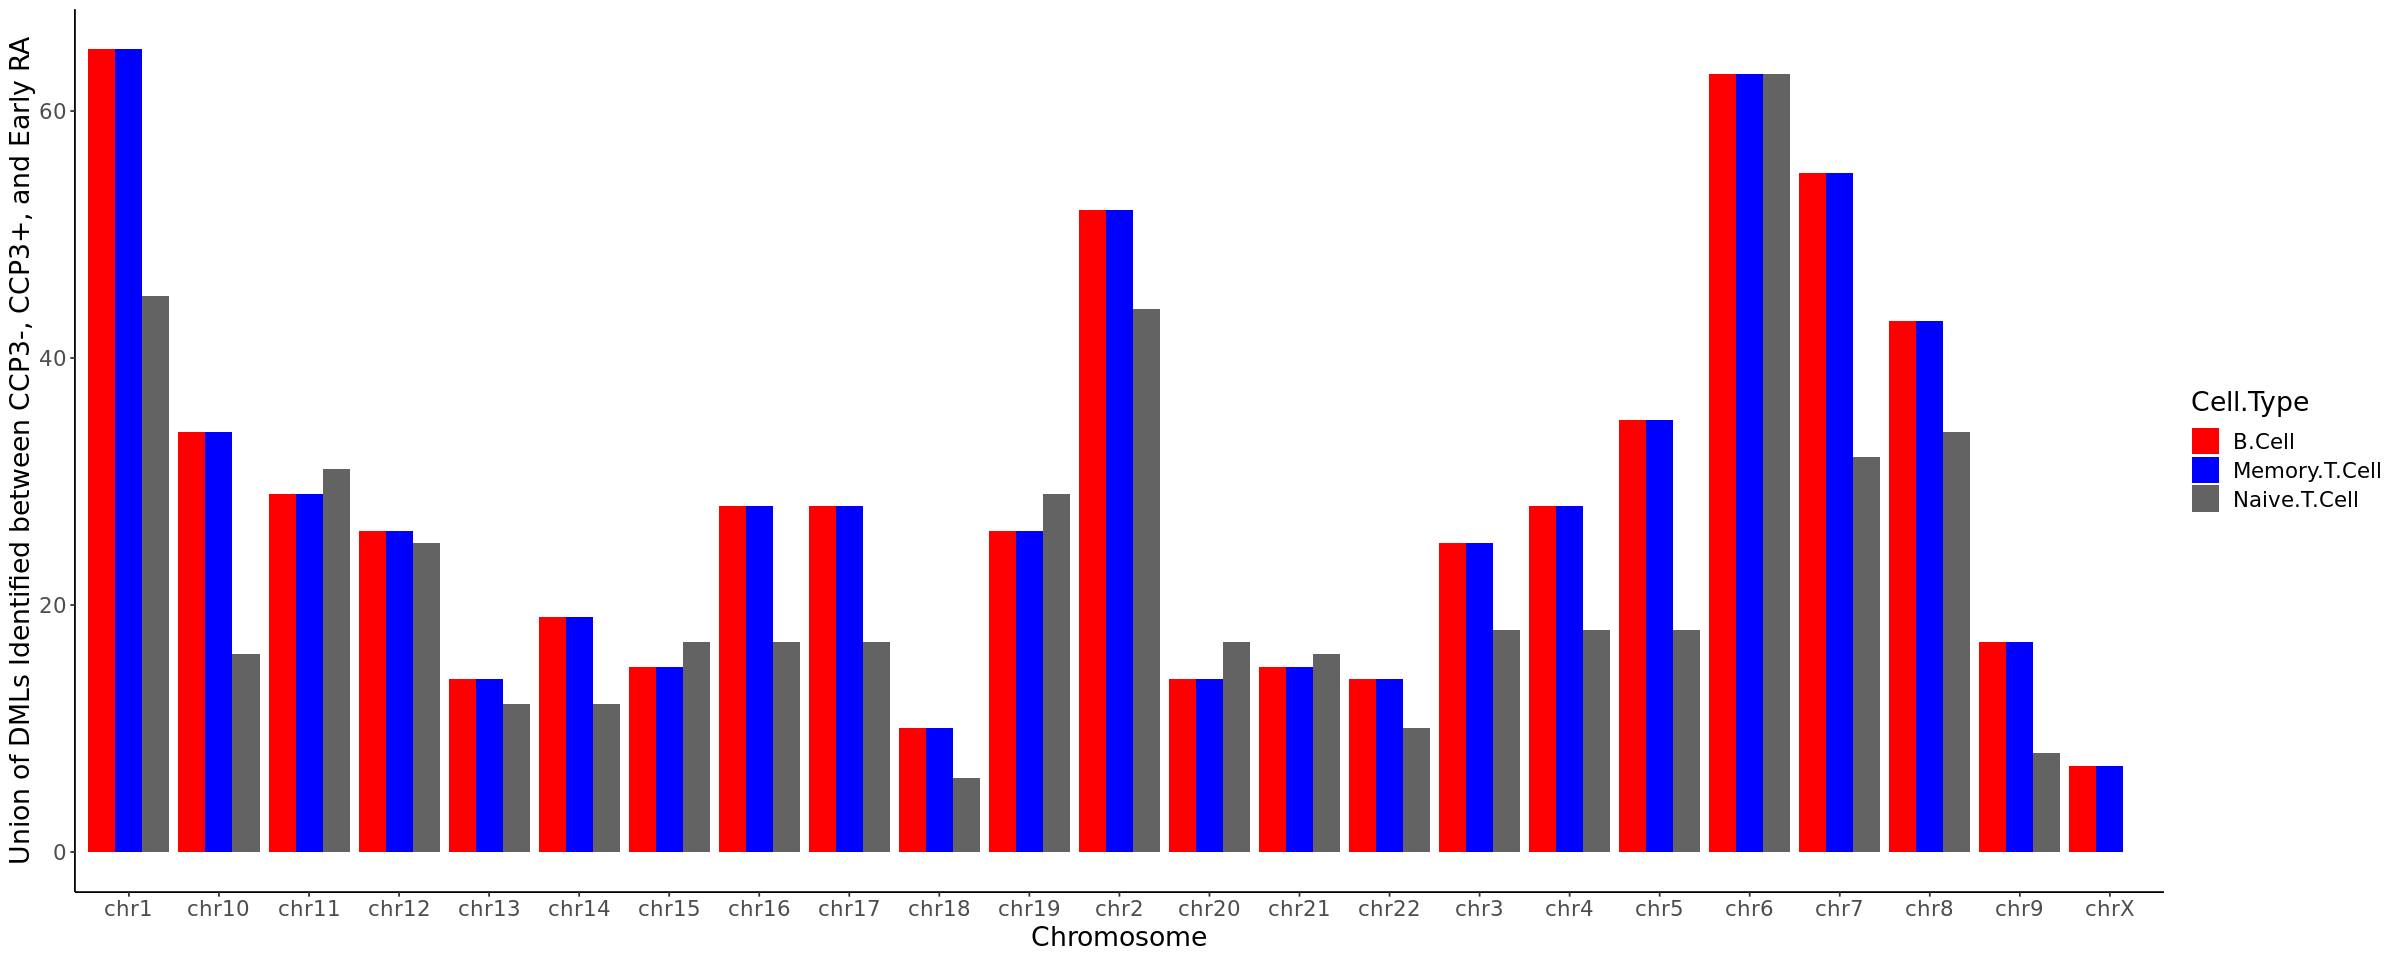

In [20]:
### Identify the DMLs on each chromosome
# create dataframe
chrOrder = c(paste("chr",1:22,sep=""),"chrX","chrY","chrM")

chr_chrFreq_vector = as.vector(factor(as.data.frame(table(anno_data[dmlUnion_v1_bCell_F_cohortUnion_allChrom_vector, ]$chr))$Var1, levels=chrOrder))
bCell_chrFreq_vector = as.vector(as.data.frame(table(anno_data[dmlUnion_v1_bCell_F_cohortUnion_allChrom_vector, ]$chr))$Freq)
tMem_chrFreq_vector = as.vector(as.data.frame(table(anno_data[dmlUnion_v1_bCell_F_cohortUnion_allChrom_vector, ]$chr))$Freq)
tNai_chrFreq_vector = as.vector(as.data.frame(table(anno_data[dmlUnion_v1_tNai_F_cohortUnion_allChrom_vector, ]$chr))$Freq)

if (length(bCell_chrFreq_vector) < length(chr_chrFreq_vector)) bCell_chrFreq_vector[seq(length(bCell_chrFreq_vector)+1,length(chr_chrFreq_vector))] = 0
if (length(tMem_chrFreq_vector) < length(chr_chrFreq_vector)) tMem_chrFreq_vector[seq(length(tMem_chrFreq_vector)+1,length(chr_chrFreq_vector))] = 0
if (length(tNai_chrFreq_vector) < length(chr_chrFreq_vector)) tNai_chrFreq_vector[seq(length(tNai_chrFreq_vector)+1,length(chr_chrFreq_vector))] = 0


chromDMLfreq_df = data.frame("chr" = chr_chrFreq_vector,
                             "B Cell" = bCell_chrFreq_vector, 
                             "Memory T Cell" = tMem_chrFreq_vector, 
                             "Naive T Cell" = tNai_chrFreq_vector)

chromDMLfreq_df = chromDMLfreq_df[order(chromDMLfreq_df$chr),]

# create plot dataframe
chromDMLfreq_plot_df = melt(chromDMLfreq_df, id = 'chr')
colnames(chromDMLfreq_plot_df) = c("chr", "Cell.Type", "value")

# create plot
options(repr.plot.width=20, repr.plot.height=8)
ggplot(chromDMLfreq_plot_df, aes(factor(chr), value, fill = Cell.Type)) + 
  geom_bar(stat="identity", position = "dodge") + 
  theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
                       panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) + 
  scale_fill_manual(values = c("red", "blue", "grey39")) + 
labs(x = "Chromosome", y = "Union of DMLs Identified between CCP3-, CCP3+, and Early RA") + 
  theme(text = element_text(size = 16))

In [21]:
# B Cell DML list
IRdisplay::display_html(dmlUnion_v1_bCell_F_cohortUnion_allChrom_vector)

cg09226051cg21665850cg14222729cg17035276cg01479768cg02310723cg26476930cg20057198cg08280036cg25251562cg04131969cg10123377cg15201545cg17035899cg07870920cg10309005cg00944873cg16906346cg17857094cg25279747cg19287610cg22785556cg20012315cg13967339cg01003893cg25009553cg01911981cg13139335cg09079173cg04399443cg15501526cg14683065cg24690094cg01680303cg06139006cg20293942cg14050976cg08777654cg02173208cg13768055cg07965995cg08103988cg21358336cg08750459cg20269954cg13590055cg17713488cg16474696cg25755428cg17132030cg02707854cg00157199cg14815891cg05699681cg04985582cg07747299cg08742575cg12016809cg05896524cg13704590cg13012494cg13546858cg14156792cg20409752cg07388700cg18379824cg02063695cg02769477cg14856563cg24920358cg12733396cg25001923cg22670572cg00775945cg16180556cg10417901cg21554180cg16661522cg09359103cg24450063cg12308308cg18865685cg07440867cg01571766cg26735507cg08747931cg08354527cg19432688cg10075506cg20846728cg19719892cg00523161cg22920501cg11765362cg09399716cg05223100cg19384241cg24247939cg26748578cg24550641cg22111694cg21118780cg20060108cg00435273cg10653474cg06753901cg21594961cg02691506cg08141281cg05170449cg22334681cg03457142cg05084668cg21459336cg01292810cg11900923cg23159337cg27058239cg15105011cg23939001cg08222618cg10181818cg03944460cg19978674cg05095125cg23228227cg03209412cg22440848cg14137381cg22025206cg11629812cg14843632cg18163325cg06795995cg10617796cg20963261cg07837187cg00528676cg25403368cg03466083cg24120669cg12262617cg04314575cg05804568cg15202874cg21548813cg18110333cg05064044cg11235426cg01516881cg26668828cg16859890cg01516851cg13401893cg12633154cg09401705cg20022036cg11404906cg10632894cg25019722cg24652615cg14600855cg05283184cg27352433cg20398163cg22852245cg26673377cg25075347cg00828154cg27001715cg09959687cg15166039cg26873880cg07343445cg22702351cg02524205cg05155812cg26052728cg03916490cg18560936cg00057627cg18467790cg11750768cg11724970cg05076221cg09549073cg04863892cg09207400cg19759481cg02916332cg17569124cg02005600cg25307665cg14014955cg02646423cg23204968cg25506432cg25390165cg01323381cg26023912cg14882265cg17432857cg00969405cg03368099cg03744763cg27151303cg05579037cg20478239cg16524778cg01499518cg23262340cg10426581cg25079981cg26723707cg15123087cg23958373cg07234876cg25601471cg02490460cg02368706cg01466164cg25286849cg02672830cg25960393cg11070274cg14921801cg09087222cg04579291cg04349084cg06106484cg25569470cg11110588cg19630984cg10187029cg20935489cg17571970cg12853648cg25813936cg25830530cg04615095cg20136671cg24863559cg13789015cg03857101cg14240646cg23591140cg02286717cg02790260cg07356745cg24898815cg01647384cg16653991cg13644160cg17416644cg27115973cg07093428cg11821245cg20308956cg21280420cg16734913cg13298116cg20943999cg14262357cg12179176cg05962950cg21224286cg12859507cg27628201cg24354819cg14279760cg09798888cg05788368cg01269617cg05373877cg12709329cg23104954cg01969535cg09122588cg18865445cg17797229cg11747695cg14154082cg05830791cg05733164cg23515828cg27120246cg27636669cg13246055cg00019654cg04453367cg09971646cg19628497cg12935359cg06289566cg23804921cg07179000cg02155558cg12036633cg17916960cg15661950cg16959075cg10838389cg26963367cg09329650cg15707029cg04547000cg26646558cg02649063cg03744383cg05672554cg00818680cg23377942cg02817932cg26657404cg10332116cg07524214cg11409361cg03641585cg20008800cg09377512cg05276469cg03049249cg01461856cg22798362cg27659862cg15831967cg08035416cg03065899cg25944011cg26725559cg20758756cg21329660cg24095188cg05537380cg27496719cg14366095cg08316083cg15174682cg18889393cg04657146cg23899408cg09314196cg20381372cg08852641cg07461715cg06322356cg06688960cg25325723cg19836589cg15350071cg08045932cg03213289cg08564027cg06103338cg20691168cg12080266cg26772386cg27008027cg17187762cg00271766cg07278285cg22333165cg25925710cg27224586cg17782550cg19924480cg11244843cg06902849cg10156298cg05337761cg07981328cg25140783cg12694142cg25303761cg16831933cg09694258cg19899222cg03002080cg13498757cg06221963cg16680214cg15602298cg11975397cg07334154cg02563106cg22790377cg06935979cg08800613cg21862353cg26094651cg15631638cg12222906cg17866650cg11883129cg08963213cg03938978cg13395344cg07929412cg20385461cg11862180

In [22]:
# Memory T Cell DML list
IRdisplay::display_html(dmlUnion_v1_tMem_F_cohortUnion_allChrom_vector)

cg04798314cg14222729cg17035276cg01479768cg02310723cg26476930cg20057198cg08280036cg19052272cg04131969cg10123377cg17035899cg07870920cg10309005cg12242038cg12897067cg00944873cg16906346cg25279747cg22785556cg18402987cg24933060cg14168080cg20305683cg05141217cg03857101cg15501526cg14403146cg27157590cg19169023cg02173208cg05528899cg07965995cg08103988cg21358336cg08750459cg02622647cg17911788cg17713488cg06489993cg12016809cg05896524cg13012494cg13732083cg13546858cg17519938cg01934408cg19757108cg21877403cg20409752cg02063695cg02769477cg14856563cg03526459cg02487331cg00044796cg23350716cg12308308cg08354527cg10075506cg20846728cg00523161cg19384241cg04426698cg25403608cg22111694cg00435273cg12108912cg26192567cg02691506cg22334681cg05084668cg23159337cg27427514cg25937052cg03209412cg09017434cg16361921cg10769442cg07522661cg08835099cg12262617cg07332563cg17876578cg21548813cg03395511cg18110333cg05064044cg11235426cg01516881cg26668828cg01171360cg07515565cg04076181cg06876321cg16859890cg11404906cg10632894cg15820961cg19301366cg13047157cg12296550cg10940969cg07935157cg22852245cg25075347cg26116556cg26937706cg07343445cg12285184cg03278670cg17172308cg14601530cg22997113cg07317062cg19142026cg03724423cg14359292cg08000746cg23958373cg07234876cg25601471cg27134251cg02490460cg01518225cg25960393cg11070274cg09232555cg04349084cg06106484cg25009553cg15427886cg18715220cg19630984cg24863559cg10022505cg24898815cg13644160cg01548680cg03306615cg19284039cg26051413cg19767548cg14332815cg04815450cg20308956cg15971518cg12621411cg03649143cg05962950cg24480012cg05788368cg18319102cg27630820cg19424457cg11931211cg17310247cg00912164cg19692240cg20796996cg03997626cg20293942cg07839933cg26168643cg06139856cg10261416cg09971646cg19628497cg23804921cg07179000cg25498107cg17916960cg26213453cg20101018cg06211550cg04547000cg00683118cg09377512cg03049249cg18507343cg18980028cg15831967cg15111296cg08316083cg26988138cg10604476cg06417478cg04657146cg11738485cg23899408cg15695738cg06322356cg06688960cg25325723cg02427933cg19836589cg01366882cg03453179cg11392297cg03351508cg12080266cg07208518cg09417038cg27244972cg27008027cg08209240cg24399712cg11247378cg09158878cg15410402cg24997886cg24445388cg04347414cg00300046cg25303761cg16831933cg07796782cg07010261cg09226051cg08800613cg26094651cg04902443cg25608392cg16435561cg07929412cg11030744cg01868071cg16141412cg08222618cg15204487cg01883570cg16737770cg04635280cg11969330cg09526685cg26371422cg05804568cg04752066cg25437304cg15675601cg06284734cg07659053cg03856504cg18467790cg26723707cg15123087cg08082879cg09050832cg03827304cg00856667cg03849132cg12443985cg12853648cg12495812cg24891660cg13562929cg06878111cg26626342cg00817464cg15417294cg17686260cg04605819cg13752895cg04238311cg08822897cg05876678cg17440869cg24482177cg09919882cg20141578cg16387046cg12292165cg19520300cg15108060cg23118561cg19359983cg26758160cg12036633cg17422692cg08296601cg19533489cg20107632cg07402062cg14431490cg03641585cg22891070cg19514972cg08191562cg11142730cg01966791cg07135405cg12742338cg17997358cg22343728cg00440468cg19637330cg26220594cg25210835cg24467349cg09445240cg19699106cg02120552cg14161159cg17865545cg09220401cg06193597cg01190459cg27207756cg10547329cg06002203cg20053110cg24796644cg26850117cg20012315cg21634283cg09549987cg20673407cg22355889cg18705301cg21205889cg02409829cg05332652cg11463444cg08477332cg23488418cg20043747cg26993334cg22444562cg03619790cg05995465cg02578087cg06494592cg04553112cg15145296cg02447542cg13388769cg06715204cg07925274cg22718636cg20456258cg20618651cg12892701cg27622527cg14867115cg03466083cg00182040cg13077031cg05163007cg00947782cg03343571cg13185413cg06249604cg09279736cg07382347cg13401893cg12633154cg16078649cg10930308cg12422154cg17615629cg03081173cg17250082cg08762424cg19432846cg04419557cg05213296cg22014112cg07185983cg06864789cg25399239cg18136963cg25643154cg05357209cg17404449cg23024343cg06369657cg09525094cg14394550cg08810842cg10357242cg04364695cg10841563cg06456847cg23304023cg14683065cg03022891cg03447554cg04074835cg15243034cg18202440cg01123725cg22190077cg23133460cg17173975cg12890080cg08967561cg20870689cg04244433cg11655627cg18105134

In [23]:
# Naive T Cell DML list
IRdisplay::display_html(dmlUnion_v1_tNai_F_cohortUnion_allChrom_vector)

cg26647036cg17486396cg04798314cg14222729cg17035276cg01479768cg02310723cg26476930cg20057198cg08280036cg25251562cg13263947cg10123377cg12534199cg15201545cg17035899cg01601518cg07870920cg10309005cg22785556cg18402987cg04633141cg02050512cg14168080cg22462396cg13967339cg01003893cg20305683cg03857101cg24690094cg19169023cg02173208cg05528899cg07965995cg08103988cg21358336cg08750459cg10909506cg02622647cg20269954cg23540632cg21237861cg17713488cg25755428cg08562657cg06489993cg07747299cg08742575cg12016809cg05896524cg05672835cg13704590cg13012494cg13732083cg10296238cg27244972cg13546858cg17519938cg01934408cg19757108cg20409752cg02063695cg02769477cg14856563cg21686600cg25303761cg24920358cg05690441cg24329783cg12308308cg08354527cg10075506cg06201514cg20846728cg00523161cg10687131cg06188210cg14414670cg11883129cg19384241cg26748578cg25403608cg22111694cg10340124cg00435273cg12108912cg22061832cg26192567cg04705669cg11518408cg02578087cg02691506cg22334681cg21529591cg05084668cg16312628cg01353941cg23159337cg27427514cg13553482cg14867115cg25474956cg03209412cg22905866cg11646117cg16361921cg17017347cg12346494cg07205286cg10769442cg12262617cg05804568cg23128634cg17876578cg21548813cg03395511cg18110333cg05064044cg11235426cg01516881cg26668828cg01171360cg06682083cg16859890cg26533311cg20110349cg25653641cg08065408cg13185413cg13401893cg03184884cg11404906cg10632894cg19301366cg14600855cg07935157cg22852245cg14079463cg25075347cg06693627cg09531659cg07343445cg22702351cg12285184cg20992785cg17172308cg05155812cg06589239cg17545141cg18467790cg19142026cg14359292cg19759481cg17569124cg25307665cg25506432cg17432857cg20478239cg00387037cg23262340cg13302927cg07234876cg25601471cg27134251cg09050832cg02490460cg01518225cg26333902cg06758847cg04349084cg06106484cg25009553cg15427886cg18715220cg19630984cg04656070cg12443985cg00021855cg13985784cg08291335cg13392078cg24863559cg24432675cg14403146cg27157590cg26630599cg24898815cg13644160cg11596302cg04605819cg17416644cg03306615cg19284039cg26051413cg04815450cg20308956cg20736913cg17385867cg18822299cg05962950cg19558933cg25108548cg23145293cg18604939cg24713959cg15448707cg05788368cg18319102cg13861644cg27630820cg19424457cg17310247cg00912164cg20293942cg07839933cg26168643cg15797131cg15233651cg12421794cg06139856cg09971646cg19628497cg13818451cg06101851cg05499111cg23804921cg07179000cg13831575cg06502383cg23628949cg17916960cg09224847cg26213453cg22470248cg07524214cg09381666cg09377512cg18980028cg15111296cg24948887cg14366095cg08316083cg26988138cg10604476cg03650189cg15011409cg06417478cg04657146cg11738485cg23899408cg15695738cg18805164cg18740583cg09554406cg07461715cg06322356cg25325723cg25621215cg02427933cg16667508cg03442914cg01900832cg25741804cg19836589cg03453179cg03213289cg03351508cg12080266cg07567097cg09417038cg27008027cg24399712cg11247378cg26863172cg04347414cg08200543cg06749803cg21877403cg24885723cg16675581cg25037394cg24863693cg03526459cg02487331cg18622663cg11294512cg07010261cg18792146cg13272845cg08483099cg04618171cg04902443cg25608392cg03938978cg08805158cg07929412cg24228952cg11045331cg03098024cg13993467cg25481160cg08222618cg15204487cg00741432cg16737770cg18443437cg23983453cg12192624cg15218485cg19523166cg01233934cg20398163cg21757387cg13133526cg16149820cg13808314cg19798735cg14096828cg09837977cg15123087cg23958373cg12568669cg15982002cg07242977cg00856667cg02160773cg13566125cg25230327cg03849132cg19435547cg12853648cg14549951cg02408697cg04536588cg13562929cg00817464cg15417294cg17686260cg07040013cg07314988cg10411146cg23052520cg02984617cg04238311cg03591565cg08822897cg02323726cg05876678cg17440869cg09721595cg00838269cg24482177cg14262357cg17575191cg12621411cg02571465cg08103496cg20141578cg02734505cg12292165cg25814283cg19520300cg03997626cg12709329cg11786848cg19359983cg13108304cg09641001cg23596287cg16826124cg09296044cg09670601cg12036633cg19797078cg15009596cg12125241cg08923669cg17422692cg16716449cg06504595cg19533489cg20107632cg14431490cg07107105cg20008800cg13236934cg03597174cg26370237cg25673720cg25317025cg22992730cg15436354cg23471274cg22891070cg08610426cg19825302cg20073962cg11142730cg24617313cg14697761

In [24]:
# B Cell DMG list
IRdisplay::display_html(sort(dmgUnion_v1_bCell_F_allChrom_vector))

ABRAC004076.9ADALADAM29ADARAL590822.2ALG1LALLCALS2CR12AMD1ANKHANKS1BAP000889.3ARHGEF10ARHGEF5AS3MTASTN1ATP8B3B3GNTL1C10orf32-ASMTC12orf75C12orf79C14orf2C14orf39C1orf35C1orf86C2orf76C3orf83C7orf50C7orf73CACNA1DCACNA2D4CAMTA1CASP9CASQ2CCL4L1CCNDBP1CCNL1CCSER2CD96CECR1CELF2CEP44CES1CHGACHIACKBCLIC5CLTACOL13A1COL22A1COL4A2COL5A3COL9A2CPXM2CTSBCUL4BDCAKDDENND6BDLEU1DLK1DNAJC16DPCR1DTNADUS4LDUSP22EBF1EGLN3EIF2B5ELK3ELMOD1EML3ENTPD2EPB42EXOC3FAM189A2FBXW8FCRL3FDFT1FIP1L1FRG1BFTOGFRALGNEGPR133GPR27GSTM1GSTM5GSTT1HCG27HDAC4HELZHLA-DQB1HLA-DRB1HOOK2HOPXHOXA3HOXA5HS6ST3IL18R1IL1RL1IRAK1BP1IZUMO1JARID2JPH3KANK1KCNA6KCNMA1KCNN3KDM4BKIAA0319KIAA1467KIAA1841LCMT2LDHCLIN7ALIPALMF1MAP10MAP4K4MCM9MKRN2MRI1MRPL28MUC21MYBPC1MYL5MYO1DMYT1LN4BP1NAALADL2NHSL1NMNAT1NRG3NXNNYAP2OR4A15OR5W2PACRGPAK1PALLDPARD6GPCDHB6PDE9API4K2BPLAC9PPIEPRF1PRKG1PROZRAE1RAP1ARCAN3RERGLRGS14RGS6RNF39RP11-219A15.1RP11-676J12.7RPF2SELKSERINC5SERPINA4SERPINA5SETD9SH3PXD2BSHC2SLC1A4SLC25A37SLC25A44SLC27A1SLCO4A1SND1SNX19SPAG11BSPATC1LSRRM3SRRTSSUH2ST6GALNAC3STON1-GTF2A1LSUN1SYTL2TANGO6TCP10L2TDRD9TENM2THSD7ATMEM175TMEM26TMEM88BTRDNTTC27UPK3BXPNPEP1ZNF12ZNF492ZNF772

In [25]:
# Memory T Cell DMG list
IRdisplay::display_html(sort(dmgUnion_v1_tMem_F_allChrom_vector))

ABCB6ABHD16BABHD17BAC005606.1AC131097.4ACCSACVR1AGO2ALG1LALLCAMD1AMZ1ANKRD33BANKS1BANTXR1AP000889.3AP3M2ARHGEF4ARHGEF5ARSGAS3MTASZ1ATE1ATG9AATP6V1AATP8B3ATXN1BAZ2BBMI1BNIP3LC10orf12C10orf32-ASMTC10orf54C10orf55C15orf62C1orf101C20ORF135C2orf27AC2orf76C3orf17C6orf58C7orf50C9orf85CACNA1ACACNA1DCACNG2CAMTA1CASP10CASP12CCL4L1CD180CD247CD3DCD3ECD3GCDH4CHIACIRH1ACLASP2CLN6CNSTCOL13A1COL5A3COMMD3COMMD3-BMI1CORO1BCPXM2CR1CYSTM1CYTIPDHRS7DIS3L2DLEU1DLK1DOCK10DOK3DOPEY2DPP4DTX1DUS4LDUSP22ECHDC1EGR3EHD1EIF2AK4ELMOD1EML6EMR3ETS1EVPLEXOC1F5FAM13AFAM19A2FANCAFBLN5FBXL16FGF1FTOFYBGALNT6GHITMGHRLGNG7GP1BAGPR133GPRIN3GSTA4GSTM5GSTT1GTF3AHCG27HDAC4HDAC5HECAHELZHIF3AHIVEP3HLA-DQB1HLA-DQB2HLA-DRB1HLA-EHMBOX1HMX2HOOK2HOPXHORMAD2HOXA3HOXA4HPS3IFITM1IFITM2IFNGIL2IL21IL23RINPP5BITCHITPR1JAK1JAM2JPH3JSRP1KCNQ1KDM4CKIAA0319KIAA0513KIAA1429KLF12KRBOX4KRTAP12-3KRTAP21-3KYNUL3MBTL3LCKLDHCLDLRAD4LIMCH1LIPFLITAFLMNB1LMTK2LRRC28LTALY86MAPRE2MARC1MARCH10MARCH11MARCH6MCCMCM9MEOX1METTL21CMFGE8MGAT4AMPOMPP7MRP63MRPL28MS4A6EMSRAMTAPMTRRMUCL1MYBPC1MYL5MYO1DMYO5CMYT1LNFRKBNHSL1NKIRAS1NOL9NOTCH1NSRP1NXNOXR1PALLDPDZRN4PECRPHACTR1PHF20L1PIWIL1PLCH1PMP22PNMAL1PNOCPPIP5K1PPP5D1PROZPTPRCAPPTPRERAB11ARAC1RAE1RALGAPA2RAP1ARASA4BRB1RFX8RIMS2RMI2RNF166RNF39RP11-159D12.5RP11-219A15.1RP11-676J12.7RP11-701P16.2RPF2RPL15RSPH6ARTN4SAMD11SAMD13SERPINA4SERPINA5SFMBT2SH3BP5SH3PXD2BSIAH3SIT1SKA3SKAP1SKIDA1SLC11A1SLC4A8SLC7A6SLFN13SMG6SMYD3SND1SNTB2SNX19SOCS1SPAG1SPAG11BSPARCL1SPATC1LSPIRE2SPRED2SRSF1SSUH2STEAP1BSTK11IPSTK39SYNE1SYNE2SYNGAP1SYTL3TACC2TAP1TBL3TCF4TCIRG1TMEM175TMEM177TNNT3TNRC6BTRAPPC9TRAT1TRIM15TRPC4APTRRAPTSPEARTTC23TTC27TUBA1CTUBGCP3TYRO3UBE2E3UCKL1UHRF1BP1UPK3BUSP39VMP1WIBGWWOXXKR6XPNPEP1XRCC1XYLT1YBEYZFP36L1ZMAT4ZNF12ZNF704ZNF788ZNF831ZPBP2

In [26]:
# Naive T Cell DMG list
IRdisplay::display_html(sort(dmgUnion_v1_tNai_F_allChrom_vector))

AC004076.9ADAMTS4ADAP1ADARB2AGBL1AKR7A2AL590822.2ALG1LALLCAMD1AP000889.3ARHGAP33ARHGEF5ATHL1ATP8B3ATP9ABREC14orf2C1orf105C2orf27AC2orf76C5orf66C7orf50CA6CACNA1ACACNA2D4CAMTA1CCL25CCL4L1CCNDBP1CD83CDH13CDH23CEACAM3CES1CHIACLIC5COL5A3COX19CPXM2CYR61CYSTM1DDAH1DDX10DLEU1DLK1DUS4LDUSP22EDARELK3ELMOD1EPB42ERHFBN1FBXL16FDFT1FGF7FOXP1FTOGDF7GNG7GSTM5GSTT1GTF3AHCG27HDAC4HECW2HIF3AHLA-DQB1HLA-DQB2HLA-DRB1HOOK2HOXA3HOXA4HOXA5HVCN1ICAM5IMMP2LITGA6IZUMO1JPH3KIAA1467KLF12LRRN3MAD1L1MATN4MCM9METTL21CMFGE8MRI1MRPL28MYBPC1MYL5MYT1LNDUFC2-KCTD14NHSL1NOL9NR2F1NXNORMDL3PACRGPALLDPARM1PIPOXPITX1PIWIL1PPIEPPP5D1PQLC2PROZPYCRLRAE1RANBP17RBFOX1RECKRNF39RP11-676J12.7RPF2RPN1SERPINA4SERPINA5SFMBT2SH3PXD2BSIAH3SLC1A4SLC39A9SLC7A2SLCO1C1SMYD3SND1SNX19SOGA3SPAG11BSPATC1LSPIRE2SRRTSSUH2STPG1SUN1TDRD9THRSPTHSD7ATMEM175TMEM177TMEM184ATMEM247TMEM88BTNFRSF6BTRAPPC9TRPS1TSHZ2TUSC1TYRO3UBE2E3UPK3BUSTXPNPEP1XYLT1YBEYZFYVE28ZMAT4ZNF12ZNF385AZNF772

In [27]:
### create dataframe of DMG, DML
dmlMatch_analysis_vector = dmlUnion_v1_tMem_F_cohortUnion_allChrom_vector
dmlMatch_analysis_df = analysis_df[dmlMatch_analysis_vector, ]
dim(dmlMatch_analysis_df)

## create vectors
# samples
ccpP_sample_vector = grep("CCPpos", colnames(dmlMatch_analysis_df), value=TRUE)
ccpM_sample_vector = grep("CCPneg", colnames(dmlMatch_analysis_df), value=TRUE)
era_sample_vector = grep("ERA", colnames(dmlMatch_analysis_df), value=TRUE)

# delta beta
bDif_ccpPvccpM_vector = rowMeans(dmlMatch_analysis_df[, c(ccpP_sample_vector)]) - rowMeans(dmlMatch_analysis_df[, c(ccpM_sample_vector)])
bDif_ccpMvera_vector = rowMeans(dmlMatch_analysis_df[, c(ccpM_sample_vector)]) - rowMeans(dmlMatch_analysis_df[, c(era_sample_vector)])
bDif_ccpPvera_vector = rowMeans(dmlMatch_analysis_df[, c(ccpP_sample_vector)]) - rowMeans(dmlMatch_analysis_df[, c(era_sample_vector)])

# P-value
pVal_ccpPvccpM_vector = apply(dmlMatch_analysis_df, 1, function (x) t.test(x[c(ccpP_sample_vector)], x[c(ccpM_sample_vector)], alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)
pVal_ccpMvera_vector = apply(dmlMatch_analysis_df, 1, function (x) t.test(x[c(ccpM_sample_vector)], x[c(era_sample_vector)], alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)
pVal_ccpPvera_vector = apply(dmlMatch_analysis_df, 1, function (x) t.test(x[c(ccpP_sample_vector)], x[c(era_sample_vector)], alternative = "two.sided", paired = FALSE, var.equal = FALSE)$p.value)

# adjusted P-Value
aPval_ccpPvccpM_vector = p.adjust(pVal_ccpPvccpM_vector, method = "BH", n = length(pVal_ccpPvccpM_vector))
aPval_ccpMvera_vector = p.adjust(pVal_ccpMvera_vector, method = "BH", n = length(pVal_ccpMvera_vector))
aPval_ccpPvera_vector = p.adjust(pVal_ccpPvera_vector, method = "BH", n = length(pVal_ccpPvera_vector))

length(aPval_ccpPvera_vector)
                             
# DMGs
# Create annotation data and define promoter regions and gene body regions
# create annotation dataframe
anno_data = getAnnotation(IlluminaHumanMethylationEPICanno.ilm10b4.hg19)

# create gRanges object of defined promoter regions
tss_gr = getHumanTSS()

promoter_gr = GRanges(seqnames=paste0("chr", seqnames(tss_gr)),
                      ranges=IRanges(start=start(ranges(tss_gr))-2500, end=start(ranges(tss_gr))+500),
                      strand=strand(tss_gr),
                      names=tss_gr$gene)

promoter_gr = sortSeqlevels(promoter_gr)
promoter_gr = sort(promoter_gr)

# create gRanges objects of defined gene body
mart = useDataset("hsapiens_gene_ensembl", useMart(biomart="ENSEMBL_MART_ENSEMBL", host="grch37.ensembl.org", path="/biomart/martservice", dataset="hsapiens_gene_ensembl"))
geneBodyCoords_df = getBM(attributes=c("hgnc_symbol", "chromosome_name", "strand", "start_position", "end_position"), mart = mart)

geneBodyCoords_filtered_df = geneBodyCoords_df[(geneBodyCoords_df$chromosome_name %in% seq(1:23)),]
geneBodyCoords_filtered_df = geneBodyCoords_filtered_df[(geneBodyCoords_filtered_df$hgnc_symbol %in% promoter_gr$names),]

class(geneBodyCoords_filtered_df$strand) = "character"
geneBodyCoords_filtered_df[geneBodyCoords_filtered_df$strand == "-1", "strand"] = "-"
geneBodyCoords_filtered_df[geneBodyCoords_filtered_df$strand == "1", "strand"] = "+"


geneBody_gr = GRanges(seqnames=paste0("chr", geneBodyCoords_filtered_df$chromosome_name), 
                      ranges=IRanges(start=geneBodyCoords_filtered_df$start_position, end=geneBodyCoords_filtered_df$end_position),
                      strand=geneBodyCoords_filtered_df$strand,
                      names=geneBodyCoords_filtered_df$hgnc_symbol)
                      
geneBody_gr = sortSeqlevels(geneBody_gr)
geneBody_gr = sort(geneBody_gr)

# create gRanges objects of defined gene body + promoter region
combinedRegion_gr = append(promoter_gr, geneBody_gr)

# create vector of DMGs
# create annotation df
dmlMatch_analysis_an = anno_data[dmlMatch_analysis_vector,]
# create gRanges object
dmlMatch_analysis_gr = GRanges(seqnames=dmlMatch_analysis_an$chr,
                ranges=IRanges(start=dmlMatch_analysis_an$pos, end=dmlMatch_analysis_an$pos),
                strand=dmlMatch_analysis_an$strand,
                names=dmlMatch_analysis_an$Name)
# take overlap by comparing coordinates against promoter / gene body gRanges object
dmlMatch_analysis_overlap_gr = subsetByOverlaps(combinedRegion_gr, dmlMatch_analysis_gr)

# output of findOverlaps is a 'hits' object indicating which of the query and subject overlap
hits = findOverlaps(combinedRegion_gr, dmlMatch_analysis_gr)

# add the DMGs from hits to the dmlMatch_analysis_gr object
mcols(dmlMatch_analysis_gr)$DMG = NA
mcols(dmlMatch_analysis_gr)$DMG[subjectHits(hits)] = mcols(combinedRegion_gr)$names[queryHits(hits)]

## create and export dataframe
dmlMatch_output_df = data.frame(DML=dmlUnion_v1_tMem_F_cohortUnion_allChrom_vector, DMG=dmlMatch_analysis_gr$DMG)
rownames(dmlMatch_output_df) = dmlMatch_output_df$DML
dmlMatch_output_df$DML = NULL
                             
# output
write.table(dmlMatch_output_df, paste0(dml_output_dir, "/dmlDMGmatch_tMem_df.csv"), sep = "\t")

## create and export M vals dataframe
M_analysis_df = getM(analysis_obj)

dmlMatch_M_output_df = M_analysis_df[rownames(dmlMatch_output_df), ]

write.table(dmlMatch_M_output_df, paste0(dml_output_dir, "/dmlDMGmatch_M_tMem_df.csv"), sep = "\t")

[1] 1007  381

[1] 1007

Warning message:
"Ensembl will soon enforce the use of https.
Ensure the 'host' argument includes "https://""
